In [1]:
import numpy as np
import math
import scipy as sp
import sympy as smp
from sympy import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy import log as ln
import math
import sympy as sym
import warnings
warnings.filterwarnings("ignore")
import cmath
from scipy.optimize import bisect
import pandas as pd
import matplotlib as mpl

C:\Users\druda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
z = smp.symbols('z', real = True, positive = True)
r = smp.symbols('r', real = True, positve = True)
x = smp.symbols('x', real = True, positve = True)
α = smp.symbols('α', real = True, positive = True)

In [3]:
W =  -z*z*0.5*sym.log(((α*z + r)*2*sym.log(2) - α*α)/(α*z*sym.log(2))) + z*(z/α - (z*z*sym.log(2))/((α*z + r)*2*sym.log(2) - α*α)) + (α - α*α/2)*(2.5 + z*z/((α*z + r)*2*sym.log(2) - α*α) - z/α - (z - α)*(z - α)/(2*α**2))
W

-0.5*z**2*log((-α**2 + (2*r + 2*z*α)*log(2))/(z*α*log(2))) + z*(-z**2*log(2)/(-α**2 + (2*r + 2*z*α)*log(2)) + z/α) + (-α**2/2 + α)*(z**2/(-α**2 + (2*r + 2*z*α)*log(2)) - z/α + 2.5 - (z - α)**2/(2*α**2))

Generalising and Solving $\frac{dw}{dx} = 0$ for different values of $\alpha$s so that we obtain different values of roots at different r's.

In [4]:
gd = x*(0.133487 + (2*α*x*x*sym.log(2)*sym.log(2) - 2*α*α*x*sym.log(2) + sym.log(2)*x*α*α*α)/(-α**2 + α*x*sym.log(4) + r*sym.log(4))**2  + r*sym.log(4)**2 + r*sym.log(4) + (1.5*α*α - 2*α + x*sym.log(8) -0.5*r)/(α**2 - α*x*sym.log(4) - r*sym.log(4)) - sym.log(-α**2 + α*x*sym.log(4) + r*sym.log(4)) + 1/α + sym.log(α) + sym.log(x))
gd

x*(r*log(4) + r*log(4)**2 + log(x) + log(α) - log(r*log(4) + x*α*log(4) - α**2) + 0.133487 + (2*x**2*α*log(2)**2 + x*α**3*log(2) - 2*x*α**2*log(2))/(r*log(4) + x*α*log(4) - α**2)**2 + (-0.5*r + x*log(8) + 1.5*α**2 - 2*α)/(-r*log(4) - x*α*log(4) + α**2) + 1/α)

 Generalised $\frac{dW}{dz}$ for $\alpha$ in (0.7, 1.3), $r$ in [0, 6.0]:

In [5]:
def f(x, α, r):
    return x*(0.133487 + (2*α*x*x*sym.log(2)*sym.log(2) - 2*α*α*x*sym.log(2) + sym.log(2)*x*α*α*α)/(-α**2 + α*x*sym.log(4) + r*sym.log(4))**2  + r*sym.log(4)**2 + r*sym.log(4) + (1.5*α*α - 2*α + x*sym.log(8) -0.5*r)/(α**2 - α*x*sym.log(4) - r*sym.log(4)) - sym.log(-α**2 + α*x*sym.log(4) + r*sym.log(4)) + 1/α + sym.log(α) + sym.log(x))


### Double Derivative

In [6]:
def g(z, r): #Double Derivative
    return (α*α*r*r*(1.92181 - 10.6568*z)+3*α**7 - (1 + 5.54518*z)*α**6 + (4.80453*z*z - 11.0904*r)*α**5 + (15.3745*r*z + 1.38629*r - 1.3321*z**3)*α**4 + (13.4527*r - 6.66049*z*z)*r*α**3 + α*(-α**6 + 4.15888*z*α**5 + (4.15888*r - 5.76544*z*z)*α**4 + (2.6642*z**3 - 11.5309*r*z)*α**3 + (7.99259*z*z - 5.76544*r)*r*α**2 + 7.99259*α*z*r*r + 2.6642*r**3)*sym.log((2*r/α*z) - α/z*sym.log(2) + 2)- 5.32839*α*r**3 - 2.6642*r**3)/(α*(α**2 - 1.38629*α*z - 1.38629*r)**3)

In [7]:
k = (α*α*r*r*(1.92181 - 10.6568*z)+3*α**7 - (1 + 5.54518*z)*α**6 + (4.80453*z*z - 11.0904*r)*α**5 + (15.3745*r*z + 1.38629*r - 1.3321*z**3)*α**4 + (13.4527*r - 6.66049*z*z)*r*α**3 + α*(-α**6 + 4.15888*z*α**5 + (4.15888*r - 5.76544*z*z)*α**4 + (2.6642*z**3 - 11.5309*r*z)*α**3 + (7.99259*z*z - 5.76544*r)*r*α**2 + 7.99259*α*z*r*r + 2.6642*r**3)*sym.log((2*r/α*z) - α/z*sym.log(2) + 2)- 5.32839*α*r**3 - 2.6642*r**3)/(α*(α**2 - 1.38629*α*z - 1.38629*r)**3)
k

0.375351130815715*(-5.32839*r**3*α - 2.6642*r**3 + r**2*α**2*(1.92181 - 10.6568*z) + r*α**3*(13.4527*r - 6.66049*z**2) + 3*α**7 - α**6*(5.54518*z + 1) + α**5*(-11.0904*r + 4.80453*z**2) + α**4*(15.3745*r*z + 1.38629*r - 1.3321*z**3) + α*(2.6642*r**3 + 7.99259*r**2*z*α + r*α**2*(-5.76544*r + 7.99259*z**2) + 4.15888*z*α**5 - α**6 + α**4*(4.15888*r - 5.76544*z**2) + α**3*(-11.5309*r*z + 2.6642*z**3))*log(2*r*z/α + 2 - α*log(2)/z))/(α*(-r - z*α + 0.721349789726536*α**2)**3)

In [8]:
α_1 = 0.95
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_1, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 0.95, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 0.95, f(z,r) =  (0.7372307432851775+0j)
for r =  0.0  and z =  -1.5  𝛼 = 0.95, f(z,r) =  (0.6352077025333077+0j)
for r =  0.0  and z =  -1.0  𝛼 = 0.95, f(z,r) =  (0.5268175472083043+0j)
for r =  0.0  and z =  -0.5  𝛼 = 0.95, f(z,r) =  (0.39560270877848186+0j)
for r =  0.0  and z =  0.0  𝛼 = 0.95, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 0.95, f(z,r) =  (1.095787114480229-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 0.95, f(z,r) =  (-0.19325696450814797+0j)
for r =  0.0  and z =  1.5  𝛼 = 0.95, f(z,r) =  (0.0002755218574768198+0j)
for r =  0.0  and z =  2.0  𝛼 = 0.95, f(z,r) =  (-0.05534983945050129+0j)
for r =  0.0  and z =  2.5  𝛼 = 0.95, f(z,r) =  (-0.1385358673076686+0j)
for r =  0.0  and z =  3.0  𝛼 = 0.95, f(z,r) =  (-0.2290975865062086+0j)
for r =  0.0  and z =  3.5  𝛼 = 0.95, f(z,r) =  (-0.32246010151272464+0j)
for r =  0.0  and z =  4.0  𝛼 = 0.95, f(z,r) =  (-0.4171180893526271+0j)
for r =  0.0  and z =  4.5  𝛼 = 0.95, f(z,r)

for r =  0.4  and z =  1.0  𝛼 = 0.95, f(z,r) =  (1.386376335732866+0j)
for r =  0.4  and z =  1.5  𝛼 = 0.95, f(z,r) =  (1.982912242734133+0j)
for r =  0.4  and z =  2.0  𝛼 = 0.95, f(z,r) =  (2.5578486906313467+0j)
for r =  0.4  and z =  2.5  𝛼 = 0.95, f(z,r) =  (3.1274675449604286+0j)
for r =  0.4  and z =  3.0  𝛼 = 0.95, f(z,r) =  (3.6950830134876784+0j)
for r =  0.4  and z =  3.5  𝛼 = 0.95, f(z,r) =  (4.261753458846564+0j)
for r =  0.4  and z =  4.0  𝛼 = 0.95, f(z,r) =  (4.827910763402696+0j)
for r =  0.4  and z =  4.5  𝛼 = 0.95, f(z,r) =  (5.393761137784258+0j)
for r =  0.45  and z =  -2.0  𝛼 = 0.95, f(z,r) =  (-2.2803308938945515+0j)
for r =  0.45  and z =  -1.5  𝛼 = 0.95, f(z,r) =  (-1.6326104096117342+0j)
for r =  0.45  and z =  -1.0  𝛼 = 0.95, f(z,r) =  (-0.9861669032507575+0j)
for r =  0.45  and z =  -0.5  𝛼 = 0.95, f(z,r) =  (-0.3483070135080216+0j)
for r =  0.45  and z =  0.0  𝛼 = 0.95, f(z,r) =  (nan+nanj)
for r =  0.45  and z =  0.5  𝛼 = 0.95, f(z,r) =  (0.748472011787634+0

In [9]:
α_2 = 0.8
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_2, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 0.8, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 0.8, f(z,r) =  (0.7379029795601848+0j)
for r =  0.0  and z =  -1.5  𝛼 = 0.8, f(z,r) =  (0.6361592879895235+0j)
for r =  0.0  and z =  -1.0  𝛼 = 0.8, f(z,r) =  (0.5282393643305184+0j)
for r =  0.0  and z =  -0.5  𝛼 = 0.8, f(z,r) =  (0.3977555209185563+0j)
for r =  0.0  and z =  0.0  𝛼 = 0.8, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 0.8, f(z,r) =  (-1.2612647569119388-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 0.8, f(z,r) =  (-0.07700138038064956+0j)
for r =  0.0  and z =  1.5  𝛼 = 0.8, f(z,r) =  (0.013770539473650223+0j)
for r =  0.0  and z =  2.0  𝛼 = 0.8, f(z,r) =  (-0.05071338318266224+0j)
for r =  0.0  and z =  2.5  𝛼 = 0.8, f(z,r) =  (-0.1362489037616256+0j)
for r =  0.0  and z =  3.0  𝛼 = 0.8, f(z,r) =  (-0.22774649928055424+0j)
for r =  0.0  and z =  3.5  𝛼 = 0.8, f(z,r) =  (-0.3215711278268678+0j)
for r =  0.0  and z =  4.0  𝛼 = 0.8, f(z,r) =  (-0.41648986380081016+0j)
for r =  0.0  and z =  4.5  𝛼 = 0.8, f(z,r) =  (-0.51199

for r =  0.35000000000000003  and z =  3.5  𝛼 = 0.8, f(z,r) =  (3.7276536415905093+0j)
for r =  0.35000000000000003  and z =  4.0  𝛼 = 0.8, f(z,r) =  (4.21048043892642+0j)
for r =  0.35000000000000003  and z =  4.5  𝛼 = 0.8, f(z,r) =  (4.693182223272752+0j)
for r =  0.4  and z =  -2.0  𝛼 = 0.8, f(z,r) =  (-1.9046425478246125+0j)
for r =  0.4  and z =  -1.5  𝛼 = 0.8, f(z,r) =  (-1.3391778292019358+0j)
for r =  0.4  and z =  -1.0  𝛼 = 0.8, f(z,r) =  (-0.7736374407348684+0j)
for r =  0.4  and z =  -0.5  𝛼 = 0.8, f(z,r) =  (-0.20934005560670685+0j)
for r =  0.4  and z =  0.0  𝛼 = 0.8, f(z,r) =  (nan+nanj)
for r =  0.4  and z =  0.5  𝛼 = 0.8, f(z,r) =  (0.8926946735185709+0j)
for r =  0.4  and z =  1.0  𝛼 = 0.8, f(z,r) =  (1.4750192346378959+0j)
for r =  0.4  and z =  1.5  𝛼 = 0.8, f(z,r) =  (2.043714706151605+0j)
for r =  0.4  and z =  2.0  𝛼 = 0.8, f(z,r) =  (2.6102706581852027+0j)
for r =  0.4  and z =  2.5  𝛼 = 0.8, f(z,r) =  (3.1761307338712044+0j)
for r =  0.4  and z =  3.0  𝛼 = 0.8, 

In [10]:
α_3 = 0.75
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_3, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 0.75, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 0.75, f(z,r) =  (0.738293325699481+0j)
for r =  0.0  and z =  -1.5  𝛼 = 0.75, f(z,r) =  (0.6367214087125826+0j)
for r =  0.0  and z =  -1.0  𝛼 = 0.75, f(z,r) =  (0.5291029507633839+0j)
for r =  0.0  and z =  -0.5  𝛼 = 0.75, f(z,r) =  (0.3991340989767037+0j)
for r =  0.0  and z =  0.0  𝛼 = 0.75, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 0.75, f(z,r) =  (-11.149838457432775-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 0.75, f(z,r) =  (-0.03887443767819976+0j)
for r =  0.0  and z =  1.5  𝛼 = 0.75, f(z,r) =  (0.019651030974081232+0j)
for r =  0.0  and z =  2.0  𝛼 = 0.75, f(z,r) =  (-0.04852988204089282+0j)
for r =  0.0  and z =  2.5  𝛼 = 0.75, f(z,r) =  (-0.1351319940474349+0j)
for r =  0.0  and z =  3.0  𝛼 = 0.75, f(z,r) =  (-0.22707258565721117+0j)
for r =  0.0  and z =  3.5  𝛼 = 0.75, f(z,r) =  (-0.32112156166056344+0j)
for r =  0.0  and z =  4.0  𝛼 = 0.75, f(z,r) =  (-0.41616906293002204+0j)
for r =  0.0  and z =  4.5  𝛼 = 0.75, f(z,r

for r =  0.35000000000000003  and z =  1.5  𝛼 = 0.75, f(z,r) =  (1.8159529964175034+0j)
for r =  0.35000000000000003  and z =  2.0  𝛼 = 0.75, f(z,r) =  (2.299686176952131+0j)
for r =  0.35000000000000003  and z =  2.5  𝛼 = 0.75, f(z,r) =  (2.7827764140556432+0j)
for r =  0.35000000000000003  and z =  3.0  𝛼 = 0.75, f(z,r) =  (3.2655833699031462+0j)
for r =  0.35000000000000003  and z =  3.5  𝛼 = 0.75, f(z,r) =  (3.7482417603977467+0j)
for r =  0.35000000000000003  and z =  4.0  𝛼 = 0.75, f(z,r) =  (4.230812923282169+0j)
for r =  0.35000000000000003  and z =  4.5  𝛼 = 0.75, f(z,r) =  (4.713328645395183+0j)
for r =  0.4  and z =  -2.0  𝛼 = 0.75, f(z,r) =  (-1.8846576793856344+0j)
for r =  0.4  and z =  -1.5  𝛼 = 0.75, f(z,r) =  (-1.319520846256967+0j)
for r =  0.4  and z =  -1.0  𝛼 = 0.75, f(z,r) =  (-0.7542997989286311+0j)
for r =  0.4  and z =  -0.5  𝛼 = 0.75, f(z,r) =  (-0.18877085220825912+0j)
for r =  0.4  and z =  0.0  𝛼 = 0.75, f(z,r) =  (nan+nanj)
for r =  0.4  and z =  0.5  𝛼 = 

In [11]:
α_4 = 1
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_4, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 1, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 1, f(z,r) =  (0.7371845225033381+0j)
for r =  0.0  and z =  -1.5  𝛼 = 1, f(z,r) =  (0.6351435786659676+0j)
for r =  0.0  and z =  -1.0  𝛼 = 1, f(z,r) =  (0.5267247940937414+0j)
for r =  0.0  and z =  -0.5  𝛼 = 1, f(z,r) =  (0.39547058006208463+0j)
for r =  0.0  and z =  0.0  𝛼 = 1, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 1, f(z,r) =  (1.1255862789657614-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 1, f(z,r) =  (-0.2097071182118488+0j)
for r =  0.0  and z =  1.5  𝛼 = 1, f(z,r) =  (-0.0010412836009430293+0j)
for r =  0.0  and z =  2.0  𝛼 = 1, f(z,r) =  (-0.055760360878669785+0j)
for r =  0.0  and z =  2.5  𝛼 = 1, f(z,r) =  (-0.13872947625035348+0j)
for r =  0.0  and z =  3.0  𝛼 = 1, f(z,r) =  (-0.2292090481786675+0j)
for r =  0.0  and z =  3.5  𝛼 = 1, f(z,r) =  (-0.322532217605111+0j)
for r =  0.0  and z =  4.0  𝛼 = 1, f(z,r) =  (-0.41716845475816017+0j)
for r =  0.0  and z =  4.5  𝛼 = 1, f(z,r) =  (-0.5124945954327906+0j)
for r =  0.

for r =  0.4  and z =  -2.0  𝛼 = 1, f(z,r) =  (-1.9524690381606258+0j)
for r =  0.4  and z =  -1.5  𝛼 = 1, f(z,r) =  (-1.388424675324555+0j)
for r =  0.4  and z =  -1.0  𝛼 = 1, f(z,r) =  (-0.8270476094066198+0j)
for r =  0.4  and z =  -0.5  𝛼 = 1, f(z,r) =  (-0.27923029402232685+0j)
for r =  0.4  and z =  0.0  𝛼 = 1, f(z,r) =  (nan+nanj)
for r =  0.4  and z =  0.5  𝛼 = 1, f(z,r) =  (0.02688774778797193+0j)
for r =  0.4  and z =  1.0  𝛼 = 1, f(z,r) =  (1.354025948462377+0j)
for r =  0.4  and z =  1.5  𝛼 = 1, f(z,r) =  (1.96651174715107+0j)
for r =  0.4  and z =  2.0  𝛼 = 1, f(z,r) =  (2.5453420737026833+0j)
for r =  0.4  and z =  2.5  𝛼 = 1, f(z,r) =  (3.116524040310829+0j)
for r =  0.4  and z =  3.0  𝛼 = 1, f(z,r) =  (3.6849373937299137+0j)
for r =  0.4  and z =  3.5  𝛼 = 1, f(z,r) =  (4.252077391480906+0j)
for r =  0.4  and z =  4.0  𝛼 = 1, f(z,r) =  (4.8185382776758+0j)
for r =  0.4  and z =  4.5  𝛼 = 1, f(z,r) =  (5.38459846385043+0j)
for r =  0.45  and z =  -2.0  𝛼 = 1, f(z,r) =  (

In [12]:
α_5 = 1.2
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_5, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 1.2, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 1.2, f(z,r) =  (0.7379447915287711+0j)
for r =  0.0  and z =  -1.5  𝛼 = 1.2, f(z,r) =  (0.63616828093664+0j)
for r =  0.0  and z =  -1.0  𝛼 = 1.2, f(z,r) =  (0.5281414696258184+0j)
for r =  0.0  and z =  -0.5  𝛼 = 1.2, f(z,r) =  (0.3973320254925739+0j)
for r =  0.0  and z =  0.0  𝛼 = 1.2, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 1.2, f(z,r) =  (0.9840270946374486-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 1.2, f(z,r) =  (1.51407631585366+0j)
for r =  0.0  and z =  1.5  𝛼 = 1.2, f(z,r) =  (0.039924246380665204+0j)
for r =  0.0  and z =  2.0  𝛼 = 1.2, f(z,r) =  (-0.045383000057612116+0j)
for r =  0.0  and z =  2.5  𝛼 = 1.2, f(z,r) =  (-0.13424168827875513+0j)
for r =  0.0  and z =  3.0  𝛼 = 1.2, f(z,r) =  (-0.226745569318044+0j)
for r =  0.0  and z =  3.5  𝛼 = 1.2, f(z,r) =  (-0.3209856315416026+0j)
for r =  0.0  and z =  4.0  𝛼 = 1.2, f(z,r) =  (-0.4161105329360617+0j)
for r =  0.0  and z =  4.5  𝛼 = 1.2, f(z,r) =  (-0.5117266498070

for r =  0.35000000000000003  and z =  3.0  𝛼 = 1.2, f(z,r) =  (3.1726246990664366+0j)
for r =  0.35000000000000003  and z =  3.5  𝛼 = 1.2, f(z,r) =  (3.658917768259012+0j)
for r =  0.35000000000000003  and z =  4.0  𝛼 = 1.2, f(z,r) =  (4.143817319786504+0j)
for r =  0.35000000000000003  and z =  4.5  𝛼 = 1.2, f(z,r) =  (4.627933114786128+0j)
for r =  0.4  and z =  -2.0  𝛼 = 1.2, f(z,r) =  (-1.9713162718920645+0j)
for r =  0.4  and z =  -1.5  𝛼 = 1.2, f(z,r) =  (-1.4081393510697404+0j)
for r =  0.4  and z =  -1.0  𝛼 = 1.2, f(z,r) =  (-0.8486360498387804+0j)
for r =  0.4  and z =  -0.5  𝛼 = 1.2, f(z,r) =  (-0.3049859372983882+0j)
for r =  0.4  and z =  0.0  𝛼 = 1.2, f(z,r) =  (nan+nanj)
for r =  0.4  and z =  0.5  𝛼 = 1.2, f(z,r) =  (-11.303690275463495-1.5707963267948966j)
for r =  0.4  and z =  1.0  𝛼 = 1.2, f(z,r) =  (1.20196643327037+0j)
for r =  0.4  and z =  1.5  𝛼 = 1.2, f(z,r) =  (1.9146051596630629+0j)
for r =  0.4  and z =  2.0  𝛼 = 1.2, f(z,r) =  (2.5110981039202844+0j)
for r

In [13]:
α_6 = 1.1
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_6, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 1.1, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 1.1, f(z,r) =  (0.7373729778580856+0j)
for r =  0.0  and z =  -1.5  𝛼 = 1.1, f(z,r) =  (0.6354004400017161+0j)
for r =  0.0  and z =  -1.0  𝛼 = 1.1, f(z,r) =  (0.5270861122905999+0j)
for r =  0.0  and z =  -0.5  𝛼 = 1.1, f(z,r) =  (0.39595996475701+0j)
for r =  0.0  and z =  0.0  𝛼 = 1.1, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 1.1, f(z,r) =  (1.07332300021111-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 1.1, f(z,r) =  (-0.04050079318741013+0j)
for r =  0.0  and z =  1.5  𝛼 = 1.1, f(z,r) =  (0.00669596245258041+0j)
for r =  0.0  and z =  2.0  𝛼 = 1.1, f(z,r) =  (-0.05360741085363941+0j)
for r =  0.0  and z =  2.5  𝛼 = 1.1, f(z,r) =  (-0.1377626702679079+0j)
for r =  0.0  and z =  3.0  𝛼 = 1.1, f(z,r) =  (-0.22866744874347283+0j)
for r =  0.0  and z =  3.5  𝛼 = 1.1, f(z,r) =  (-0.32218784991609095+0j)
for r =  0.0  and z =  4.0  𝛼 = 1.1, f(z,r) =  (-0.41693083624574895+0j)
for r =  0.0  and z =  4.5  𝛼 = 1.1, f(z,r) =  (-0.5123210127

for r =  0.35000000000000003  and z =  1.5  𝛼 = 1.1, f(z,r) =  (1.6910606890545297+0j)
for r =  0.35000000000000003  and z =  2.0  𝛼 = 1.1, f(z,r) =  (2.200206180374586+0j)
for r =  0.35000000000000003  and z =  2.5  𝛼 = 1.1, f(z,r) =  (2.6932999259951944+0j)
for r =  0.35000000000000003  and z =  3.0  𝛼 = 1.1, f(z,r) =  (3.181186595038121+0j)
for r =  0.35000000000000003  and z =  3.5  𝛼 = 1.1, f(z,r) =  (3.6668324474788343+0j)
for r =  0.35000000000000003  and z =  4.0  𝛼 = 1.1, f(z,r) =  (4.151337180847324+0j)
for r =  0.35000000000000003  and z =  4.5  𝛼 = 1.1, f(z,r) =  (4.635191578346666+0j)
for r =  0.4  and z =  -2.0  𝛼 = 1.1, f(z,r) =  (-1.9642553627231851+0j)
for r =  0.4  and z =  -1.5  𝛼 = 1.1, f(z,r) =  (-1.400800644454465+0j)
for r =  0.4  and z =  -1.0  𝛼 = 1.1, f(z,r) =  (-0.8407303586844914+0j)
for r =  0.4  and z =  -0.5  𝛼 = 1.1, f(z,r) =  (-0.29604743426328217+0j)
for r =  0.4  and z =  0.0  𝛼 = 1.1, f(z,r) =  (nan+nanj)
for r =  0.4  and z =  0.5  𝛼 = 1.1, f(z,r) =

In [14]:
α_7 = 1.15
for i in np.arange(0, 0.6, 0.05):
    for j in np.arange(-2, 5, 0.5):
        y = complex(f(j, α_7, i))
        print("for r = ", i, " and z = ", j, " 𝛼 = 1.15, f(z,r) = ", y)

for r =  0.0  and z =  -2.0  𝛼 = 1.15, f(z,r) =  (0.7376105167066809+0j)
for r =  0.0  and z =  -1.5  𝛼 = 1.15, f(z,r) =  (0.635720926780576+0j)
for r =  0.0  and z =  -1.0  𝛼 = 1.15, f(z,r) =  (0.5275298316587754+0j)
for r =  0.0  and z =  -0.5  𝛼 = 1.15, f(z,r) =  (0.3965442106826233+0j)
for r =  0.0  and z =  0.0  𝛼 = 1.15, f(z,r) =  (nan+nanj)
for r =  0.0  and z =  0.5  𝛼 = 1.15, f(z,r) =  (1.02987772053959-1.5707963267948966j)
for r =  0.0  and z =  1.0  𝛼 = 1.15, f(z,r) =  (0.3700870449124609+0j)
for r =  0.0  and z =  1.5  𝛼 = 1.15, f(z,r) =  (0.018931764040548287+0j)
for r =  0.0  and z =  2.0  𝛼 = 1.15, f(z,r) =  (-0.05044645042433956+0j)
for r =  0.0  and z =  2.5  𝛼 = 1.15, f(z,r) =  (-0.1363864579289527+0j)
for r =  0.0  and z =  3.0  𝛼 = 1.15, f(z,r) =  (-0.22790947770386066+0j)
for r =  0.0  and z =  3.5  𝛼 = 1.15, f(z,r) =  (-0.32171104601066464+0j)
for r =  0.0  and z =  4.0  𝛼 = 1.15, f(z,r) =  (-0.41660425679087654+0j)
for r =  0.0  and z =  4.5  𝛼 = 1.15, f(z,r) =  

for r =  0.4  and z =  1.0  𝛼 = 1.15, f(z,r) =  (1.242318232015876+0j)
for r =  0.4  and z =  1.5  𝛼 = 1.15, f(z,r) =  (1.925368465729596+0j)
for r =  0.4  and z =  2.0  𝛼 = 1.15, f(z,r) =  (2.517562971642834+0j)
for r =  0.4  and z =  2.5  𝛼 = 1.15, f(z,r) =  (3.09357089806062+0j)
for r =  0.4  and z =  3.0  𝛼 = 1.15, f(z,r) =  (3.6643042166147977+0j)
for r =  0.4  and z =  3.5  𝛼 = 1.15, f(z,r) =  (4.232756996395411+0j)
for r =  0.4  and z =  4.0  𝛼 = 1.15, f(z,r) =  (4.800043292647909+0j)
for r =  0.4  and z =  4.5  𝛼 = 1.15, f(z,r) =  (5.3666620930724+0j)
for r =  0.45  and z =  -2.0  𝛼 = 1.15, f(z,r) =  (-2.3069133693700605+0j)
for r =  0.45  and z =  -1.5  𝛼 = 1.15, f(z,r) =  (-1.660444709122968+0j)
for r =  0.45  and z =  -1.0  𝛼 = 1.15, f(z,r) =  (-1.0170794487445018+0j)
for r =  0.45  and z =  -0.5  𝛼 = 1.15, f(z,r) =  (-0.3881585823961834+0j)
for r =  0.45  and z =  0.0  𝛼 = 1.15, f(z,r) =  (nan+nanj)
for r =  0.45  and z =  0.5  𝛼 = 1.15, f(z,r) =  (-6.249504969117279+0j)
fo

### Basically the following is happening in this file:

1. We take the general form of $\frac{dW}{dz}$
2. For different values of $\alpha$s, we find different roots using bisection method in different ranges.
3. We obtained 2 real roots for each value of r.
4. After obtaining all the roots, we apply constraints. The first being $\theta_{1}$ < $\theta_{2}$
5. The second constraint applied is double derivative $\frac{d^{2}W}{dz^{2}}$ < 0.


In [15]:
def e(x):
    return x*(0.133487 + (2*α*x*x*sym.log(2)*sym.log(2))/(-α**2 + α*x*sym.log(4) + r*sym.log(4))**2 + (1.5*α**2)/(α**2 - 1.38629*α*x - 1.38629*r) + (0.5*r)/(-0.721348*α*α + α*x + r) - (2*α*α*x*sym.log(2))/(-α*α + α*x*sym.log(4) + r*sym.log(4))**2 + (2*α)/(-α**2 + α*x*sym.log(4) + r*sym.log(4)) - sym.log(-α**2 + α*x*sym.log(4) + r*sym.log(4)) + (x*sym.log(8))/(α**2 - α*x*sym.log(4) - r*sym.log(4)) + (0.6931478*x*α*α*α)/(α**2 - 1.38629*α*x - 1.38629*r)**2 + 1/α + sym.log(α) + sym.log(x))


In [16]:
α = α_1
for r in np.arange(0.00, 0.20, 0.05):
    x = bisect(e, 1, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.370457649230957
for r =  0.05 ,root =  1.2652578353881836
for r =  0.1 ,root =  1.1600103378295898
for r =  0.15000000000000002 ,root =  1.0547552108764648


In [17]:
for r in np.arange(0.00, 0.60, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.5068750381469727
for r =  0.05 ,root =  1.5892515182495117
for r =  0.1 ,root =  1.6553430557250977
for r =  0.15000000000000002 ,root =  1.7103281021118164
for r =  0.2 ,root =  1.7569646835327148
for r =  0.25 ,root =  1.7969236373901367
for r =  0.30000000000000004 ,root =  1.8313016891479492
for r =  0.35000000000000003 ,root =  1.8608713150024414
for r =  0.4 ,root =  1.8861875534057617
for r =  0.45 ,root =  1.9076662063598633
for r =  0.5 ,root =  1.925623893737793
for r =  0.55 ,root =  1.9403085708618164


In [18]:
for r in np.arange(0.20, 0.45, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.2 ,root =  0.9494962692260742
for r =  0.25 ,root =  0.8442354202270508
for r =  0.3 ,root =  0.7389726638793945
for r =  0.35 ,root =  0.6337118148803711
for r =  0.39999999999999997 ,root =  0.5284490585327148


In [19]:
α_1_root_1 = [1.370457649, 1.26525783, 1.160010337, 1.054755211, 0.94949627, 0.84423542, 0.73897266, 0.63371181, 0.528449058, None, None, None]
α_1_root_2 = [1.5068750, 1.58925152, 1.6553431, 1.7103281, 1.7569647, 1.79692364, 1.83130169, 1.8608713, 1.8861875, 1.9076662, 1.92562389, 1.9403086]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_1 = pd.DataFrame(list(zip(rent, α_1_root_1, α_1_root_2)), columns =['r', 'α_1_root_1', 'α_1_root_2'])

In [20]:
def c(x, r):# W(z)
    return -x*x*0.5*sym.log(((α*x + r)*2*sym.log(2) - α*α)/(α*x*sym.log(2))) + x*(x/α - (x*x*sym.log(2))/((α*x + r)*2*sym.log(2) - α*α)) + (α - α*α/2)*(2.5 + x*x/((α*x + r)*2*sym.log(2) - α*α) - x/α - (x - α)*(x - α)/(2*α**2))


In [21]:
soln_1 = []
for (i, j) in zip(t_1.α_1_root_1, t_1.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_1['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_1.α_1_root_2, t_1.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_1['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_1.α_1_root_1, t_1.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_1['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_1.α_1_root_2, t_1.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_1['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_1.α_1_root_1:
    x = i - 1
    θ_2a.append(x)
t_1['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_1.α_1_root_2:
    x = i - 1
    θ_2b.append(x)
t_1['θ_2b'] = θ_2b
# apply function
t_1['θ_a_opt'] = t_1.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_1['θ_b_opt'] = t_1.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_1 = []
for (i,j) in zip(t_1.α_1_root_1, t_1.r):
    y = complex(g(i, j))
    sign_1.append(np.sign(y.real))
sign_2 = []
for (i,j) in zip(t_1.α_1_root_2, t_1.r):
    y = complex(g(i, j))
    sign_2.append(np.sign(y.real))
t_1['dd_sign_1'] = sign_1
t_1['dd_sign_2'] = sign_2

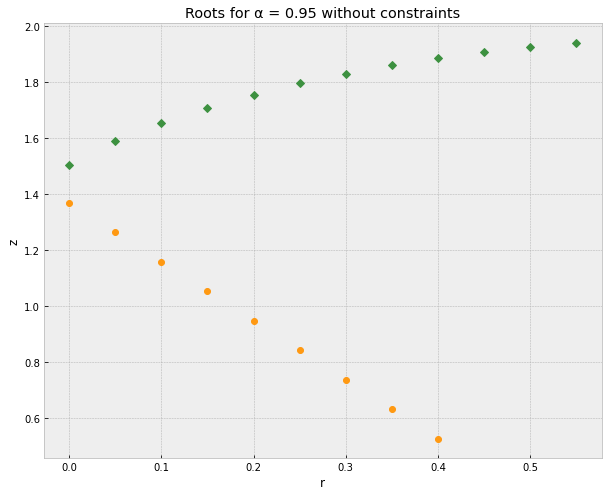

In [22]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_1.r, t_1['α_1_root_1'], 'o', color='#FF9912')
plt.plot(t_1.r, t_1['α_1_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 0.95 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [23]:
t_1

,r,α_1_root_1,α_1_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,1.370458,1.506875,1.516541,1.516687,0.446715,0.445317,0.370458,0.506875,No,Yes,-1.0,-1.0
1,0.05,1.265258,1.589252,1.513480,1.515401,0.347743,0.375809,0.265258,0.589252,No,Yes,-1.0,-1.0
2,0.10,1.160010,1.655343,1.504295,1.511033,0.249041,0.325035,0.160010,0.655343,No,Yes,-1.0,-1.0
3,0.15,1.054755,1.710328,1.488986,1.504329,0.150694,0.284141,0.054755,0.710328,No,Yes,-1.0,-1.0
4,0.20,0.949496,1.756965,1.467555,1.495754,0.052839,0.249143,-0.050504,0.756965,No,Yes,1.0,-1.0
5,0.25,0.844235,1.796924,1.440000,1.485624,-0.044306,0.217936,-0.155765,0.796924,No,Yes,1.0,-1.0
6,0.30,0.738973,1.831302,1.406321,1.474178,-0.140369,0.189282,-0.261027,0.831302,No,Yes,1.0,-1.0
7,0.35,0.633712,1.860871,1.366520,1.461597,-0.234670,0.162399,-0.366288,0.860871,No,Yes,1.0,-1.0
8,0.40,0.528449,1.886187,1.320594,1.448030,-0.325793,0.136763,-0.471551,0.886187,No,Yes,1.0,-1.0
9,0.45,NaN,1.907666,NaN,1.433597,NaN,0.112005,NaN,0.907666,No,Yes,NaN,-1.0


## Global Maxima

In [24]:
m1 = t_1['W_1'].max()
m2 = t_1['W_2'].max()
max(m1, m2)# Global maxima before constraints

1.516686823133685

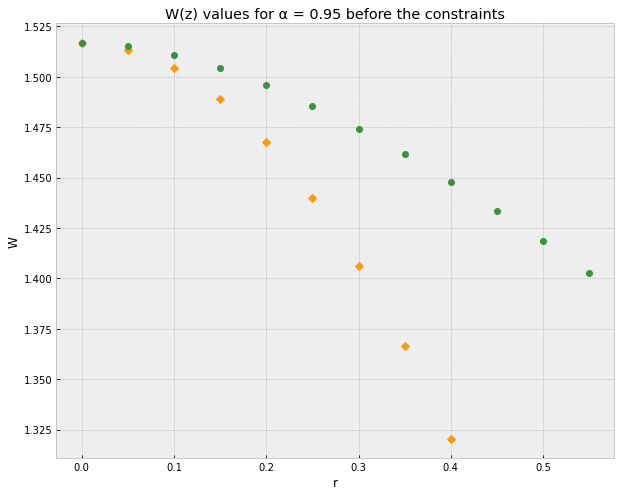

In [25]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_1.r, t_1.W_1, 'D', color='#FF9912')
plt.plot(t_1.r, t_1.W_2, 'o', color='#3D9140')
plt.title("W(z) values for α = 0.95 before the constraints")
plt.ylabel("W")
plt.xlabel("r")
plt.show()

In [26]:
t_1.iloc[:, 3:4] = None
t_1.iloc[:, 1:2] = None

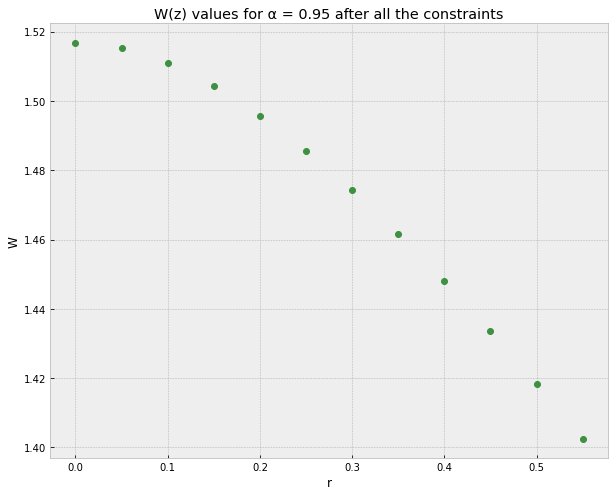

In [27]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_1.r, t_1.W_1, 'D', color='#FF9912')
plt.plot(t_1.r, t_1.W_2, 'o', color='#3D9140')
plt.title("W(z) values for α = 0.95 after all the constraints")
plt.ylabel("W")
plt.xlabel("r")
plt.show()

In [28]:
t_1

,r,α_1_root_1,α_1_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,None,1.506875,None,1.516687,0.446715,0.445317,0.370458,0.506875,No,Yes,-1.0,-1.0
1,0.05,None,1.589252,None,1.515401,0.347743,0.375809,0.265258,0.589252,No,Yes,-1.0,-1.0
2,0.10,None,1.655343,None,1.511033,0.249041,0.325035,0.160010,0.655343,No,Yes,-1.0,-1.0
3,0.15,None,1.710328,None,1.504329,0.150694,0.284141,0.054755,0.710328,No,Yes,-1.0,-1.0
4,0.20,None,1.756965,None,1.495754,0.052839,0.249143,-0.050504,0.756965,No,Yes,1.0,-1.0
5,0.25,None,1.796924,None,1.485624,-0.044306,0.217936,-0.155765,0.796924,No,Yes,1.0,-1.0
6,0.30,None,1.831302,None,1.474178,-0.140369,0.189282,-0.261027,0.831302,No,Yes,1.0,-1.0
7,0.35,None,1.860871,None,1.461597,-0.234670,0.162399,-0.366288,0.860871,No,Yes,1.0,-1.0
8,0.40,None,1.886187,None,1.448030,-0.325793,0.136763,-0.471551,0.886187,No,Yes,1.0,-1.0
9,0.45,None,1.907666,None,1.433597,NaN,0.112005,NaN,0.907666,No,Yes,NaN,-1.0


In [29]:
m1 = 0
m2 = t_1['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.516686823133685

In [30]:
α_2 = 0.8
α = α_2
for r in np.arange(0.00, 0.10, 0.05):
    x = bisect(e, 1, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.1541376113891602
for r =  0.05 ,root =  1.0291452407836914


In [31]:
for r in np.arange(0.00, 0.25, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.641270637512207
for r =  0.05 ,root =  1.7415990829467773
for r =  0.1 ,root =  1.827937126159668
for r =  0.15000000000000002 ,root =  1.9040765762329102
for r =  0.2 ,root =  1.9722414016723633


In [32]:
for r in np.arange(0.10, 0.30, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.1 ,root =  0.904149055480957
for r =  0.15000000000000002 ,root =  0.7791509628295898
for r =  0.20000000000000004 ,root =  0.6541509628295898
for r =  0.25000000000000006 ,root =  0.5291528701782227


In [33]:
for r in np.arange(0.25, 0.60, 0.05):
    x = bisect(e, 2.0, 2.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.25 ,root =  2.033871650695801
for r =  0.3 ,root =  2.089959144592285
for r =  0.35 ,root =  2.141221046447754
for r =  0.39999999999999997 ,root =  2.1881933212280273
for r =  0.44999999999999996 ,root =  2.231287956237793
for r =  0.49999999999999994 ,root =  2.2708253860473633
for r =  0.5499999999999999 ,root =  2.307061195373535


In [34]:
α_2_root_1 = [1.1541376, 1.02914524, 0.9041491, 0.77915096, 0.65415096, 0.52915287, None, None, None, None, None, None]
α_2_root_2 = [1.6412706, 1.7415991, 1.827937, 1.9040766, 1.9722414, 2.0338716, 2.0899591, 2.141221, 2.188193, 2.23128796, 2.2708254, 2.3070612]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_2 = pd.DataFrame(list(zip(rent, α_2_root_1, α_2_root_2)), columns =['r', 'α_2_root_1', 'α_2_root_2'])

In [35]:
soln_1 = []
for (i, j) in zip(t_2.α_2_root_1, t_2.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_2['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_2.α_2_root_2, t_2.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_2['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_2.α_2_root_1, t_2.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_2['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_2.α_2_root_2, t_2.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_2['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_2.α_2_root_1:
    x = i - 1
    θ_2a.append(x)
t_2['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_2.α_2_root_2:
    x = i - 1
    θ_2b.append(x)
t_2['θ_2b'] = θ_2b
# apply function
t_2['θ_a_opt'] = t_2.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_2['θ_b_opt'] = t_2.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_3 = []
for (i,j) in zip(t_2.α_2_root_1, t_2.r):
    y = complex(g(i, j))
    sign_3.append(np.sign(y.real))
sign_4 = []
for (i,j) in zip(t_2.α_2_root_2, t_2.r):
    y = complex(g(i, j))
    sign_4.append(np.sign(y.real))
t_2['dd_sign_1'] = sign_3
t_2['dd_sign_2'] = sign_4

In [36]:
m1 = t_2['W_1'].max()
m2 = t_2['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.4780464055852915

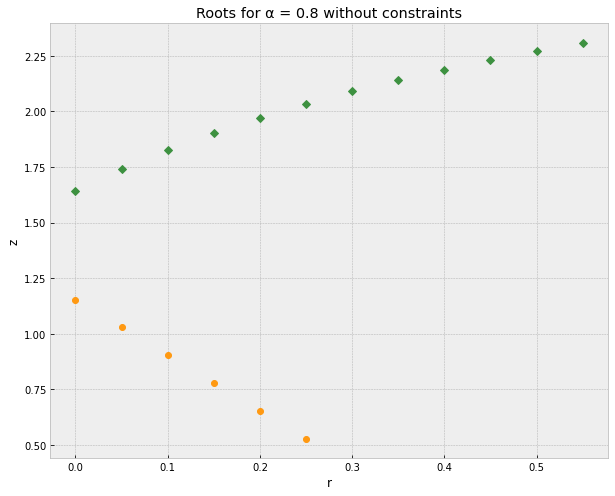

In [37]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_2.r, t_2['α_2_root_1'], 'o', color='#FF9912')
plt.plot(t_2.r, t_2['α_2_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 0.8 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [38]:
t_2.iloc[0:6, 3:4] = None
t_2.iloc[0:6, 1:2] = None

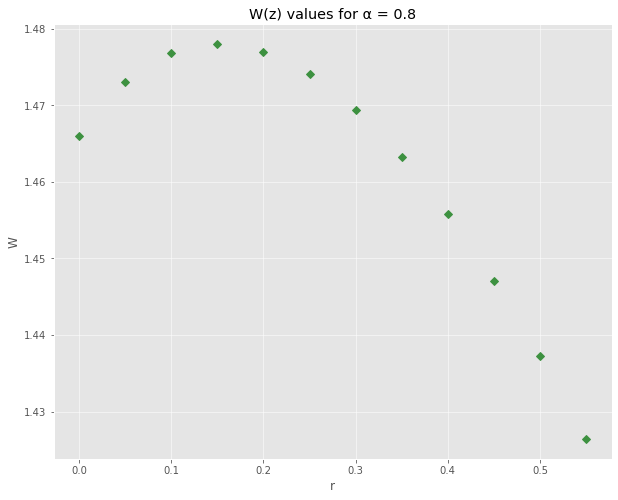

In [39]:
plt.figure(figsize = (10, 8))
plt.style.use('ggplot')
plt.plot( t_2.r, t_2.W_1, 'o', color='#FF9912')
plt.plot( t_2.r, t_2.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 0.8")
plt.ylabel("W")
plt.xlabel("r")
plt.show()

In [40]:
t_2.iloc[:, 1:2] = None

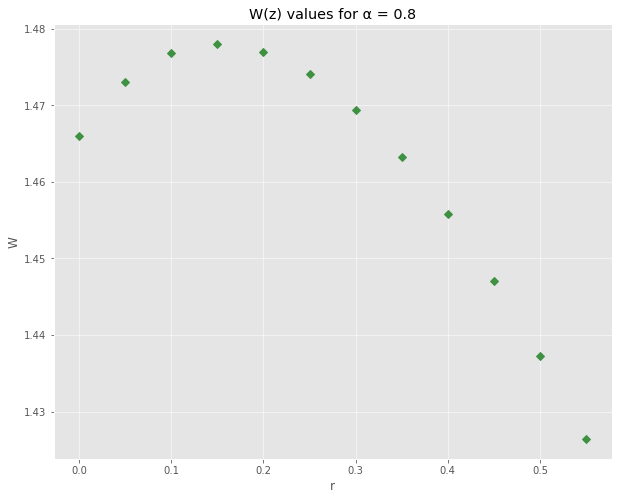

In [41]:
plt.figure(figsize = (10, 8))
plt.style.use('ggplot')
plt.plot( t_2.r, t_2.W_1, 'o', color='#FF9912')
plt.plot( t_2.r, t_2.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 0.8")
plt.ylabel("W")
plt.xlabel("r")
plt.show()

In [42]:
t_2

,r,α_2_root_1,α_2_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,None,1.641271,NaN,1.465990,0.538891,0.464127,0.154138,0.641271,No,Yes,-1.0,-1.0
1,0.05,None,1.741599,NaN,1.473083,0.480082,0.417035,0.029145,0.741599,No,Yes,-1.0,-1.0
2,0.10,None,1.827937,NaN,1.476884,0.445334,0.384627,-0.095851,0.827937,No,Yes,1.0,-1.0
3,0.15,None,1.904077,NaN,1.478046,0.460698,0.360182,-0.220849,0.904077,No,Yes,1.0,-1.0
4,0.20,None,1.972241,NaN,1.477000,0.611078,0.340462,-0.345849,0.972241,No,Yes,1.0,-1.0
5,0.25,None,2.033872,NaN,1.474048,1.421945,0.323702,-0.470847,1.033872,No,Yes,1.0,-1.0
6,0.30,None,2.089959,NaN,1.469421,NaN,0.308851,NaN,1.089959,No,Yes,NaN,-1.0
7,0.35,None,2.141221,NaN,1.463298,NaN,0.295242,NaN,1.141221,No,Yes,NaN,-1.0
8,0.40,None,2.188193,NaN,1.455824,NaN,0.282428,NaN,1.188193,No,Yes,NaN,-1.0
9,0.45,None,2.231288,NaN,1.447119,NaN,0.270101,NaN,1.231288,No,Yes,NaN,-1.0


In [43]:
m1 = 0
m2 = t_2['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.4780464055852915

In [44]:
α_3 = 0.75
α = α_3
for r in np.arange(0.00, 0.05, 0.05):
    x = bisect(e, 1, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.0820093154907227


In [45]:
for r in np.arange(0.00, 0.20, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.6744909286499023
for r =  0.05 ,root =  1.7887372970581055
for r =  0.1 ,root =  1.8886537551879883
for r =  0.15000000000000002 ,root =  1.9781389236450195


In [46]:
for r in np.arange(0.05, 0.25, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.05 ,root =  0.9486799240112305
for r =  0.1 ,root =  0.8153486251831055
for r =  0.15000000000000002 ,root =  0.6820173263549805
for r =  0.2 ,root =  0.5486841201782227


In [47]:
for r in np.arange(0.20, 0.60, 0.05):
    x = bisect(e, 2.0, 2.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.2 ,root =  2.059493064880371
for r =  0.25 ,root =  2.134209632873535
for r =  0.3 ,root =  2.2033205032348633
for r =  0.35 ,root =  2.267573356628418
for r =  0.39999999999999997 ,root =  2.3275346755981445
for r =  0.44999999999999996 ,root =  2.3836374282836914
for r =  0.49999999999999994 ,root =  2.436221122741699
for r =  0.5499999999999999 ,root =  2.4855642318725586


In [48]:
α_3_root_1 = [1.674491, 1.788737, 1.888654, 1.978139, 2.0594931, 2.1342096, 2.2033205, 2.2675734, 2.32753468, 2.3836374, 2.4362211, 2.4855642]
α_3_root_2 = [1.082009, 0.948680, 0.815348, 0.682017, 0.5486841, None, None, None, None, None, None, None]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_3 = pd.DataFrame(list(zip(rent, α_3_root_1, α_3_root_2)), columns =['r', 'α_3_root_1', 'α_3_root_2'])

In [49]:
soln_1 = []
for (i, j) in zip(t_3.α_3_root_1, t_3.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_3['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_3.α_3_root_2, t_3.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_3['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_3.α_3_root_1, t_3.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_3['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_3.α_3_root_2, t_3.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_3['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_3.α_3_root_1:
    x = i - 1
    θ_2a.append(x)
t_3['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_3.α_3_root_2:
    x = i - 1
    θ_2b.append(x)
t_3['θ_2b'] = θ_2b
# apply function
t_3['θ_a_opt'] = t_3.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_3['θ_b_opt'] = t_3.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_5 = []
for (i,j) in zip(t_3.α_3_root_1, t_3.r):
    y = complex(g(i, j))
    sign_5.append(np.sign(y.real))
sign_6 = []
for (i,j) in zip(t_3.α_3_root_2, t_3.r):
    y = complex(g(i, j))
    sign_6.append(np.sign(y.real))
t_3['dd_sign_1'] = sign_5
t_3['dd_sign_2'] = sign_6

In [50]:
m1 = t_3['W_1'].max()
m2 = t_3['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.4693496873198917

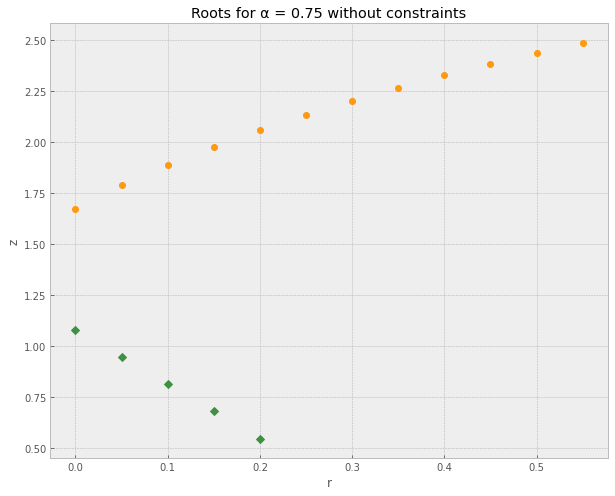

In [51]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_3.r, t_3['α_3_root_1'], 'o', color='#FF9912')
plt.plot(t_3.r, t_3['α_3_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 0.75 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

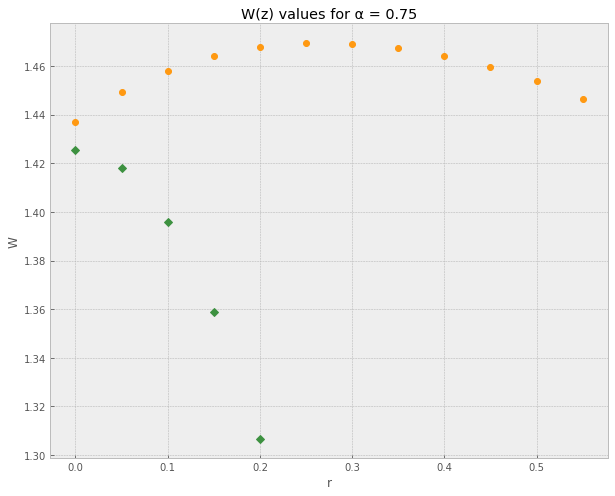

In [52]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_3.r, t_3.W_1, 'o', color='#FF9912')
plt.plot(t_3.r, t_3.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 0.75")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [53]:
t_3.iloc[1:5, 4:5] = None
t_3.iloc[1:5, 2:3] = None

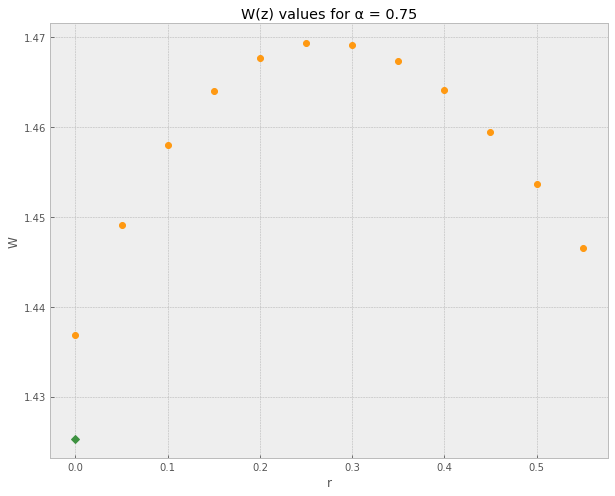

In [54]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_3.r, t_3.W_1, 'o', color='#FF9912')
plt.plot(t_3.r, t_3.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 0.75")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [55]:
t_3.iloc[:, 4:5] = None
t_3.iloc[:, 2:3] = None

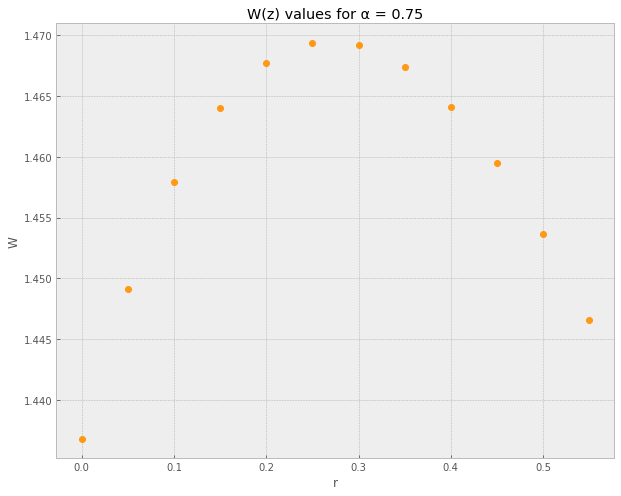

In [56]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_3.r, t_3.W_1, 'o', color='#FF9912')
plt.plot(t_3.r, t_3.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 0.75")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [57]:
t_3

,r,α_3_root_1,α_3_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,1.674491,None,1.436835,None,0.470880,0.623050,0.674491,0.082009,Yes,No,-1.0,-1.0
1,0.05,1.788737,None,1.449139,None,0.431721,0.622590,0.788737,-0.051320,Yes,No,-1.0,1.0
2,0.10,1.888654,None,1.457972,None,0.407321,0.713378,0.888654,-0.184652,Yes,No,-1.0,1.0
3,0.15,1.978139,None,1.464012,None,0.390765,1.101515,0.978139,-0.317983,Yes,No,-1.0,1.0
4,0.20,2.059493,None,1.467701,None,0.378775,4.506436,1.059493,-0.451316,Yes,No,-1.0,1.0
5,0.25,2.134210,None,1.469350,None,0.369582,NaN,1.134210,NaN,Yes,No,-1.0,NaN
6,0.30,2.203320,None,1.469192,None,0.362148,NaN,1.203320,NaN,Yes,No,-1.0,NaN
7,0.35,2.267573,None,1.467407,None,0.355822,NaN,1.267573,NaN,Yes,No,-1.0,NaN
8,0.40,2.327535,None,1.464141,None,0.350178,NaN,1.327535,NaN,Yes,No,-1.0,NaN
9,0.45,2.383637,None,1.459514,None,0.344921,NaN,1.383637,NaN,Yes,No,-1.0,NaN


In [58]:
m1 = t_3['W_1'].max()
m2 = 0
max(m1, m2) # Global maxima after constraints. m2 is zero bcs the 2nd row has nothing but null values.

1.4693496873198917

In [59]:
α_4 = 1

In [60]:
α = α_4
for r in np.arange(0.05, 0.25, 0.05):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.05 ,root =  1.342616081237793
for r =  0.1 ,root =  1.2426557540893555
for r =  0.15000000000000002 ,root =  1.1426706314086914
for r =  0.2 ,root =  1.042677879333496


In [61]:
for r in np.arange(0.05, 0.65, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.05 ,root =  1.528183937072754
for r =  0.1 ,root =  1.5937738418579102
for r =  0.15000000000000002 ,root =  1.6468496322631836
for r =  0.2 ,root =  1.6908750534057617
for r =  0.25 ,root =  1.7278413772583008
for r =  0.3 ,root =  1.759016990661621
for r =  0.35000000000000003 ,root =  1.7852602005004883
for r =  0.4 ,root =  1.8071870803833008
for r =  0.45 ,root =  1.8252496719360352
for r =  0.5 ,root =  1.8397893905639648
for r =  0.55 ,root =  1.8510656356811523
for r =  0.6000000000000001 ,root =  1.8592805862426758


In [62]:
for r in np.arange(0.25, 0.50, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.25 ,root =  0.9426813125610352
for r =  0.3 ,root =  0.8426847457885742
for r =  0.35 ,root =  0.7426862716674805
for r =  0.39999999999999997 ,root =  0.6426877975463867
for r =  0.44999999999999996 ,root =  0.542689323425293


In [63]:
α_4_root_1 = [1.442700, 1.5281839, 1.5937738, 1.6468496, 1.690875, 1.7278414, 1.75901699, 1.78526020, 1.8071871, 1.8252496, 1.8397894, 1.8510656]
α_4_root_2 = [None, 1.3426160, 1.2426557, 1.1426706, 1.04267788, 0.9426813, 0.8426847, 0.7426863, 0.6426878, 0.5426893, None]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_4 = pd.DataFrame(list(zip(rent, α_4_root_1, α_4_root_2)), columns =['r', 'α_4_root_1', 'α_4_root_2'])

In [64]:
soln_1 = []
for (i, j) in zip(t_4.α_4_root_1, t_4.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_4['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_4.α_4_root_2, t_4.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_4['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_4.α_4_root_1, t_4.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_4['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_4.α_4_root_2, t_4.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_4['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_4.α_4_root_1:
    x = i - 1
    θ_2a.append(x)
t_4['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_4.α_4_root_2:
    x = i - 1
    θ_2b.append(x)
t_4['θ_2b'] = θ_2b
# apply function
t_4['θ_a_opt'] = t_4.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_4['θ_b_opt'] = t_4.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_7 = []
for (i,j) in zip(t_4.α_4_root_1, t_4.r):
    y = complex(g(i, j))
    sign_7.append(np.sign(y.real))
sign_8 = []
for (i,j) in zip(t_4.α_4_root_2, t_4.r):
    y = complex(g(i, j))
    sign_8.append(np.sign(y.real))
t_4['dd_sign_1'] = sign_7
t_4['dd_sign_2'] = sign_8

In [65]:
t_4=t_4.fillna(0)
m1 = t_4['W_1'].max()
m2 = t_4['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.5203422452514022

In [66]:
t_4

,r,α_4_root_1,α_4_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,1.442700,0.000000,1.520342,0.000000,0.442695,0.000000,0.442700,0.000000,Yes,No,-1.0,0.0
1,0.05,1.528184,1.342616,1.518208,1.517842,0.362772,0.342695,0.528184,0.342616,Yes,No,-1.0,-1.0
2,0.10,1.593774,1.242656,1.512791,1.510342,0.306071,0.242695,0.593774,0.242656,Yes,No,-1.0,-1.0
3,0.15,1.646850,1.142671,1.504994,1.497842,0.260859,0.142695,0.646850,0.142671,Yes,No,-1.0,-1.0
4,0.20,1.690875,1.042678,1.495344,1.480342,0.222313,0.042695,0.690875,0.042678,Yes,No,-1.0,-1.0
5,0.25,1.727841,0.942681,1.484188,1.457842,0.188003,-0.057305,0.727841,-0.057319,Yes,No,-1.0,-1.0
6,0.30,1.759017,0.842685,1.471779,1.430342,0.156542,-0.157305,0.759017,-0.157315,Yes,No,-1.0,1.0
7,0.35,1.785260,0.742686,1.458307,1.397842,0.127069,-0.257305,0.785260,-0.257314,Yes,No,-1.0,1.0
8,0.40,1.807187,0.642688,1.443925,1.360342,0.099017,-0.357305,0.807187,-0.357312,Yes,No,-1.0,1.0
9,0.45,1.825250,0.542689,1.428758,1.317842,0.071990,-0.457305,0.825250,-0.457311,Yes,No,-1.0,1.0


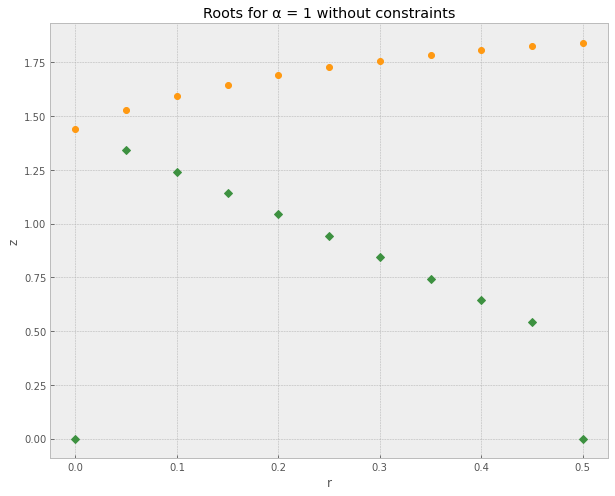

In [67]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_4.r, t_4['α_4_root_1'], 'o', color='#FF9912')
plt.plot(t_4.r, t_4['α_4_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 1 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

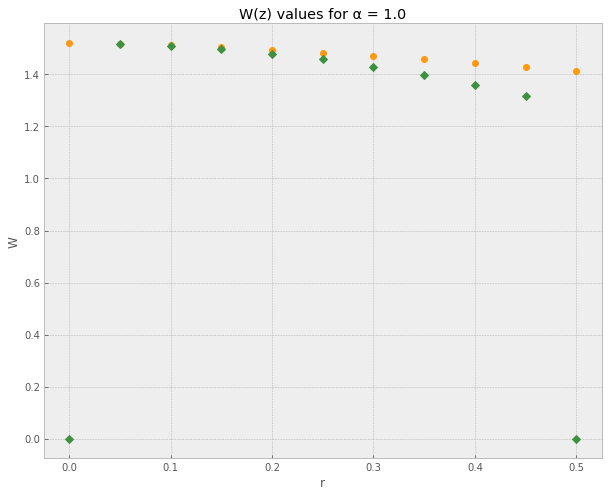

In [68]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_4.r, t_4.W_1, 'o', color='#FF9912')
plt.plot(t_4.r, t_4.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.0")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [69]:
t_4.iloc[6:10, 4:5] = None
t_4.iloc[6:10, 2:3] = None

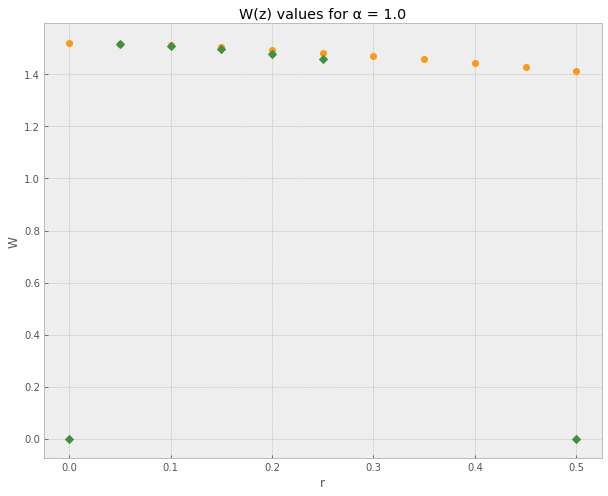

In [70]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_4.r, t_4.W_1, 'o', color='#FF9912')
plt.plot(t_4.r, t_4.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.0")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [71]:
t_4.iloc[:, 4:5] = None
t_4.iloc[:, 2:3] = None

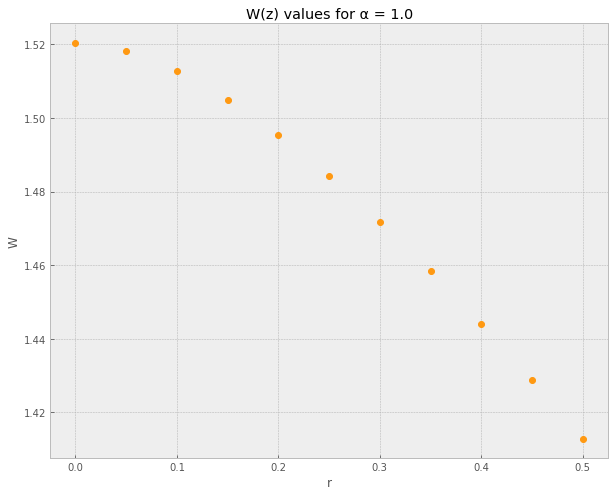

In [72]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_4.r, t_4.W_1, 'o', color='#FF9912')
plt.plot(t_4.r, t_4.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.0")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [73]:
t_4=t_4.fillna(0)
m1 = t_4['W_1'].max()
m2 = t_4['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.5203422452514022

In [74]:
t_4

,r,α_4_root_1,α_4_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,1.442700,0,1.520342,0,0.442695,0.000000,0.442700,0.000000,Yes,No,-1.0,0.0
1,0.05,1.528184,0,1.518208,0,0.362772,0.342695,0.528184,0.342616,Yes,No,-1.0,-1.0
2,0.10,1.593774,0,1.512791,0,0.306071,0.242695,0.593774,0.242656,Yes,No,-1.0,-1.0
3,0.15,1.646850,0,1.504994,0,0.260859,0.142695,0.646850,0.142671,Yes,No,-1.0,-1.0
4,0.20,1.690875,0,1.495344,0,0.222313,0.042695,0.690875,0.042678,Yes,No,-1.0,-1.0
5,0.25,1.727841,0,1.484188,0,0.188003,-0.057305,0.727841,-0.057319,Yes,No,-1.0,-1.0
6,0.30,1.759017,0,1.471779,0,0.156542,-0.157305,0.759017,-0.157315,Yes,No,-1.0,1.0
7,0.35,1.785260,0,1.458307,0,0.127069,-0.257305,0.785260,-0.257314,Yes,No,-1.0,1.0
8,0.40,1.807187,0,1.443925,0,0.099017,-0.357305,0.807187,-0.357312,Yes,No,-1.0,1.0
9,0.45,1.825250,0,1.428758,0,0.071990,-0.457305,0.825250,-0.457311,Yes,No,-1.0,1.0


In [75]:
α_5 = 1.2

In [76]:
α = α_5
for r in np.arange(0.0, 0.15, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.7312746047973633
for r =  0.05 ,root =  1.647953987121582
for r =  0.1 ,root =  1.5646429061889648


In [77]:
for r in np.arange(0.0, 0.136, 0.005):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.7312746047973633
for r =  0.005 ,root =  1.7229433059692383
for r =  0.01 ,root =  1.7146100997924805
for r =  0.015 ,root =  1.7062788009643555
for r =  0.02 ,root =  1.6979455947875977
for r =  0.025 ,root =  1.6896142959594727
for r =  0.03 ,root =  1.6812810897827148
for r =  0.035 ,root =  1.6729497909545898
for r =  0.04 ,root =  1.664616584777832
for r =  0.045 ,root =  1.656285285949707
for r =  0.05 ,root =  1.647953987121582
for r =  0.055 ,root =  1.639622688293457
for r =  0.06 ,root =  1.6312894821166992
for r =  0.065 ,root =  1.6229581832885742
for r =  0.07 ,root =  1.6146268844604492
for r =  0.075 ,root =  1.6062955856323242
for r =  0.08 ,root =  1.5979642868041992
for r =  0.085 ,root =  1.589634895324707
for r =  0.09 ,root =  1.581303596496582
for r =  0.095 ,root =  1.572972297668457
for r =  0.1 ,root =  1.5646429061889648
for r =  0.105 ,root =  1.5563135147094727
for r =  0.11 ,root =  1.5479841232299805
for r =  0.115 ,root =  1.539654

In [78]:
for r in np.arange(0.1, 0.136, 0.005):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.1 ,root =  1.1640691757202148
for r =  0.10500000000000001 ,root =  1.1876649856567383
for r =  0.11000000000000001 ,root =  1.2068853378295898
for r =  0.11500000000000002 ,root =  1.223402976989746
for r =  0.12000000000000002 ,root =  1.2380380630493164
for r =  0.12500000000000003 ,root =  1.2512598037719727
for r =  0.13000000000000003 ,root =  1.2633657455444336
for r =  0.13500000000000004 ,root =  1.2745656967163086


In [79]:
for r in np.arange(0.45, 0.6, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.45 ,root =  0.981205940246582
for r =  0.5 ,root =  0.8978776931762695
for r =  0.55 ,root =  0.814549446105957


In [80]:
for r in np.arange(0.4, 0.45, 0.05):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.4 ,root =  1.0645322799682617


In [81]:
for r in np.arange(0.40, 0.65, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.4 ,root =  1.5152158737182617
for r =  0.45 ,root =  1.532423973083496
for r =  0.5 ,root =  1.5452280044555664
for r =  0.55 ,root =  1.5542078018188477
for r =  0.6 ,root =  1.5597848892211914


In [82]:
α_5_root_1 = [1.731274, 1.647954, 1.564643, None, None, None, None, None, 1.0645322, 0.981206, 0.8978777, 0.8145494]
α_5_root_2 = [None, None, 1.1640692, None, None, None, None, None, 1.5152158, 1.532424, 1.5452280, 1.5542078]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55]
t_5 = pd.DataFrame(list(zip(rent, α_5_root_1, α_5_root_2)), columns =['r', 'α_5_root_1', 'α_5_root_2'])

In [83]:
soln_1 = []
for (i, j) in zip(t_5.α_5_root_1, t_5.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_5['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_5.α_5_root_2, t_5.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_5['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_5.α_5_root_1, t_5.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_5['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_5.α_5_root_2, t_5.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_5['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_5.α_5_root_1:
    x = i - 1
    θ_2a.append(x)
t_5['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_5.α_5_root_2:
    x = i - 1
    θ_2b.append(x)
t_5['θ_2b'] = θ_2b
# apply function
t_5['θ_a_opt'] = t_5.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_5['θ_b_opt'] = t_5.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_x3 = []
for (i,j) in zip(t_5.α_5_root_1, t_5.r):
    y = complex(g(i, j))
    sign_x3.append(np.sign(y.real))
sign_x4 = []
for (i,j) in zip(t_5.α_5_root_2, t_5.r):
    y = complex(g(i, j))
    sign_x4.append(np.sign(y.real))
t_5['dd_sign_1'] = sign_x3
t_5['dd_sign_2'] = sign_x4

In [84]:
t_5= t_5.fillna(0)
m1 = t_5['W_1'].max()
m2 = t_5['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.4595285553083395

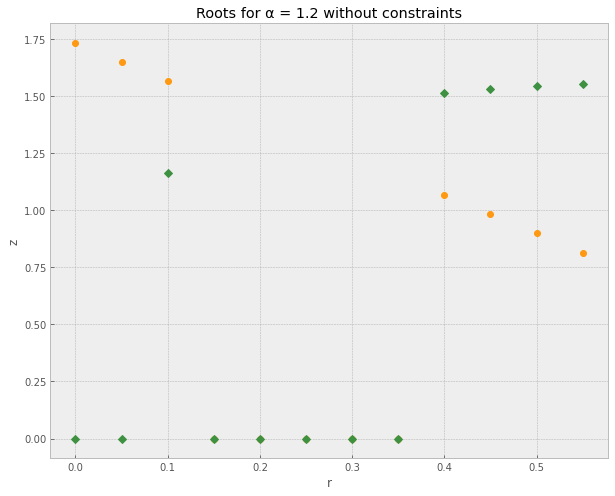

In [85]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_5.r, t_5['α_5_root_1'], 'o', color='#FF9912')
plt.plot(t_5.r, t_5['α_5_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 1.2 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [86]:
t_5

,r,α_5_root_1,α_5_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.00,1.731274,0.000000,1.459529,0.000000,0.483925,0.000000,0.731274,0.000000,Yes,No,-1.0,0.0
1,0.05,1.647954,0.000000,1.458371,0.000000,0.390403,0.000000,0.647954,0.000000,Yes,No,-1.0,0.0
2,0.10,1.564643,1.164069,1.454899,1.451671,0.297636,0.248390,0.564643,0.164069,Yes,No,-1.0,-1.0
3,0.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,No,0.0,0.0
4,0.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,No,0.0,0.0
5,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,No,0.0,0.0
6,0.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,No,0.0,0.0
7,0.35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No,No,0.0,0.0
8,0.40,1.064532,1.515216,1.385454,1.390997,-0.237586,-0.038471,0.064532,0.515216,Yes,Yes,-1.0,-1.0
9,0.45,0.981206,1.532424,1.365779,1.375919,-0.321861,-0.068921,-0.018794,0.532424,Yes,Yes,-1.0,-1.0


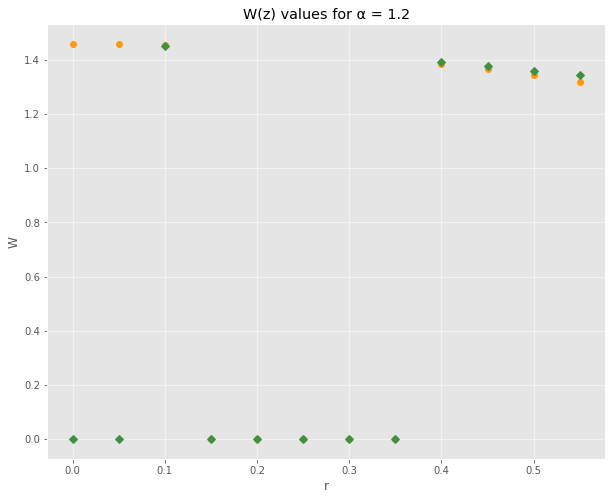

In [87]:
plt.figure(figsize = (10, 8))
plt.style.use('ggplot')
plt.plot(t_5.r, t_5.W_1, 'o', color='#FF9912')
plt.plot(t_5.r, t_5.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.2")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [88]:
t_5.iloc[11:, 3:4] = None
t_5.iloc[11:, 2:3] = None

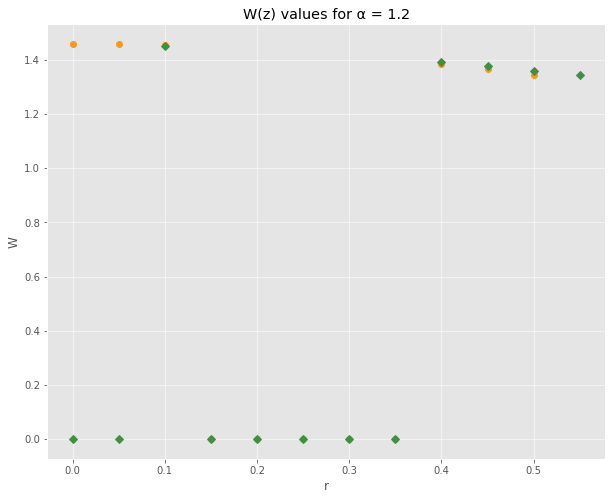

In [89]:
plt.figure(figsize = (10, 8))
plt.style.use('ggplot')
plt.plot(t_5.r, t_5.W_1, 'o', color='#FF9912')
plt.plot(t_5.r, t_5.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.2")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [90]:
t_5.iloc[2:3, 4:5] = None
t_5.iloc[2:3, 2:3] = None

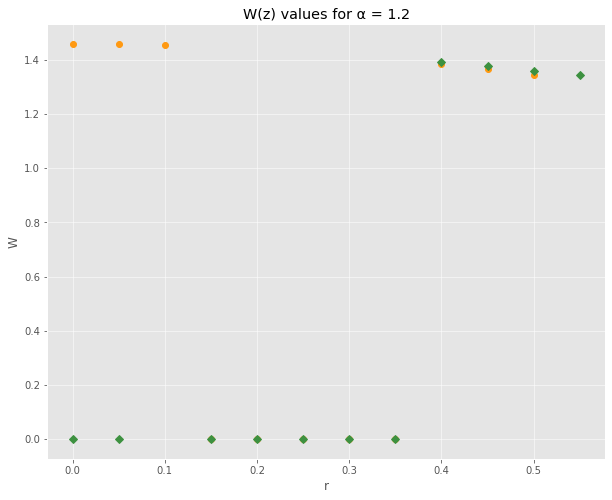

In [91]:
plt.figure(figsize = (10, 8))
plt.style.use('ggplot')
plt.plot(t_5.r, t_5.W_1, 'o', color='#FF9912')
plt.plot(t_5.r, t_5.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.2")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [92]:
t_5=t_5.fillna(0)
m1 = t_5['W_1'].max()
m2 = t_5['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.4595285553083395

In [93]:
α_6 = 1.1

In [94]:
α = α_6
for r in np.arange(0.0, 0.05, 0.01):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.2166318893432617
for r =  0.01 ,root =  1.258835792541504
for r =  0.02 ,root =  1.2915220260620117
for r =  0.03 ,root =  1.3188753128051758
for r =  0.04 ,root =  1.3426733016967773


In [95]:
for r in np.arange(0.0, 0.05, 0.01):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.5870332717895508
for r =  0.01 ,root =  1.5688600540161133
for r =  0.02 ,root =  1.5506887435913086
for r =  0.03 ,root =  1.5325231552124023
for r =  0.04 ,root =  1.5143613815307617


In [96]:
for r in np.arange(0.15, 0.35, 0.05):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.15 ,root =  1.3141489028930664
for r =  0.2 ,root =  1.223280906677246
for r =  0.25 ,root =  1.1323881149291992
for r =  0.30000000000000004 ,root =  1.0414857864379883


In [97]:
for r in np.arange(0.15, 0.60, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.15 ,root =  1.5058698654174805
for r =  0.2 ,root =  1.5518712997436523
for r =  0.25 ,root =  1.588637351989746
for r =  0.30000000000000004 ,root =  1.6183671951293945
for r =  0.3500000000000001 ,root =  1.6424150466918945
for r =  0.40000000000000013 ,root =  1.6616830825805664
for r =  0.45000000000000007 ,root =  1.6768007278442383
for r =  0.5000000000000001 ,root =  1.6882257461547852
for r =  0.5500000000000002 ,root =  1.6962976455688477


In [98]:
for r in np.arange(0.35, 0.60, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.35 ,root =  0.9505834579467773
for r =  0.39999999999999997 ,root =  0.8596773147583008
for r =  0.44999999999999996 ,root =  0.7687711715698242
for r =  0.49999999999999994 ,root =  0.6778631210327148
for r =  0.5499999999999999 ,root =  0.5869550704956055


In [99]:
α_6_root_1 = [1.5870332, 1.568860, 1.550688, 1.5325231, 1.514361, 1.5058699, 1.5518713, 1.588637, 1.6183672, 1.6424150, 1.6616831, 1.6768007, 1.6882257, 1.6962976]
α_6_root_2 = [1.21663189, 1.2588358, 1.291522, 1.318875, 1.342673, 1.3141489, 1.2232809, 1.132388, 1.0414858, 0.9505834, 0.859677, 0.7687711, 0.6778631, 0.5869551]
rent = [0, 0.01, 0.02, 0.03, 0.04, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_6 = pd.DataFrame(list(zip(rent, α_6_root_1, α_6_root_2)), columns =['r', 'α_6_root_1', 'α_6_root_2'])

In [100]:
soln_1 = []
for (i, j) in zip(t_6.α_6_root_1, t_6.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_6['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_6.α_6_root_2, t_6.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_6['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_6.α_6_root_1, t_6.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_6['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_6.α_6_root_2, t_6.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_6['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_6.α_6_root_1:
    x = i - 1
    θ_2a.append(x)
t_6['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_6.α_6_root_2:
    x = i - 1
    θ_2b.append(x)
t_6['θ_2b'] = θ_2b
# apply function
t_6['θ_a_opt'] = t_6.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_6['θ_b_opt'] = t_6.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_9 = []
for (i,j) in zip(t_6.α_6_root_1, t_6.r):
    y = complex(g(i, j))
    sign_9.append(np.sign(y.real))
sign_x = []
for (i,j) in zip(t_6.α_6_root_2, t_6.r):
    y = complex(g(i, j))
    sign_x.append(np.sign(y.real))
t_6['dd_sign_1'] = sign_9
t_6['dd_sign_2'] = sign_x

In [101]:
t_6=t_6.fillna(0)
m1 = t_6['W_1'].max()
m2 = t_6['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.5051388225846218

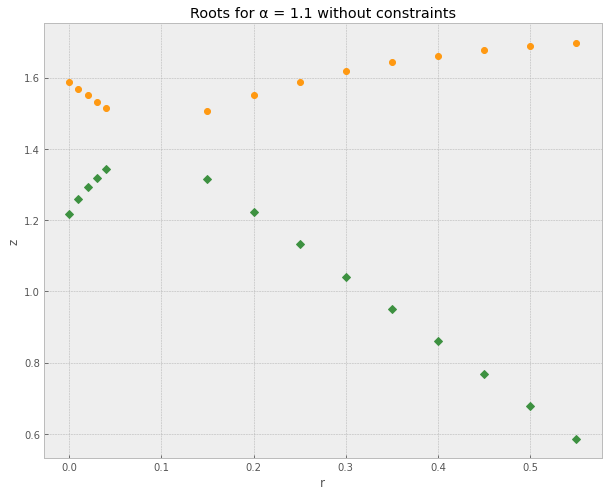

In [102]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_6.r, t_6['α_6_root_1'], 'o', color='#FF9912')
plt.plot(t_6.r, t_6['α_6_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 1.1 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

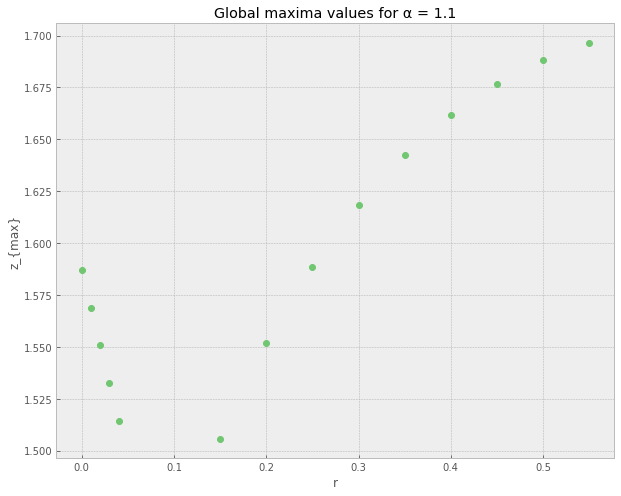

In [103]:
t_6['global maxima'] = t_6.apply(lambda x: x['α_6_root_1'] if x['W_1'] > x['W_2'] else x['α_6_root_2'], axis=1)
plt.figure(figsize = (10, 8))
plt.plot(t_6.r, t_6['global maxima'], 'o', color='#71C671')
plt.title("Global maxima values for α = 1.1")
plt.xlabel("r")
plt.ylabel("z_{max}")
plt.show()

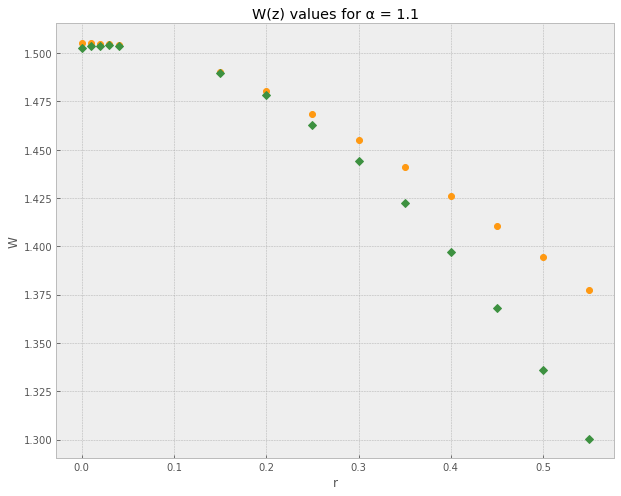

In [104]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_6.r, t_6.W_1, 'o', color='#FF9912', label = t_6.dd_sign_1)
plt.plot(t_6.r, t_6.W_2, 'D', color='#3D9140', label = t_6.dd_sign_2)
plt.title("W(z) values for α = 1.1")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [105]:
t_6

,r,α_6_root_1,α_6_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2,global maxima
0,0.00,1.587033,1.216632,1.505139,1.502515,0.454728,0.494286,0.587033,0.216632,Yes,No,-1.0,-1.0,1.587033
1,0.01,1.568860,1.258836,1.505071,1.503456,0.435152,0.447216,0.568860,0.258836,Yes,No,-1.0,-1.0,1.568860
2,0.02,1.550688,1.291522,1.504868,1.503900,0.415589,0.413166,0.550688,0.291522,Yes,No,-1.0,-1.0,1.550688
3,0.03,1.532523,1.318875,1.504530,1.503980,0.396039,0.385940,0.532523,0.318875,Yes,No,-1.0,-1.0,1.532523
4,0.04,1.514361,1.342673,1.504057,1.503769,0.376502,0.362998,0.514361,0.342673,Yes,No,-1.0,-1.0,1.514361
5,0.15,1.505870,1.314149,1.490335,1.489925,0.213264,0.162483,0.505870,0.314149,Yes,Yes,-1.0,-1.0,1.505870
6,0.20,1.551871,1.223281,1.480148,1.478091,0.168486,0.065925,0.551871,0.223281,Yes,Yes,-1.0,-1.0,1.551871
7,0.25,1.588637,1.132388,1.468351,1.462877,0.129415,-0.030088,0.588637,0.132388,Yes,Yes,-1.0,-1.0,1.588637
8,0.30,1.618367,1.041486,1.455283,1.444282,0.094014,-0.125443,0.618367,0.041486,Yes,Yes,-1.0,-1.0,1.618367
9,0.35,1.642415,0.950583,1.441187,1.422306,0.061127,-0.219999,0.642415,-0.049417,Yes,Yes,-1.0,-1.0,1.642415


In [106]:
t_6.iloc[10:, 4:5] = None
t_6.iloc[10:, 2:3] = None

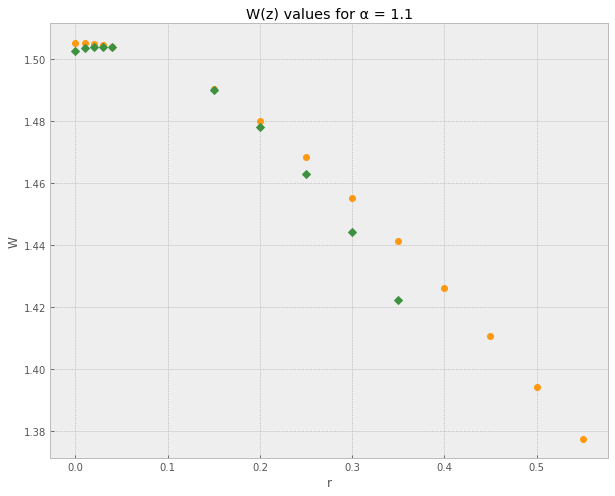

In [107]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_6.r, t_6.W_1, 'o', color='#FF9912', label = t_6.dd_sign_1)
plt.plot(t_6.r, t_6.W_2, 'D', color='#3D9140', label = t_6.dd_sign_2)
plt.title("W(z) values for α = 1.1")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [108]:
t_6.iloc[0:5, 4:5] = None
t_6.iloc[0:5, 2:3] = None

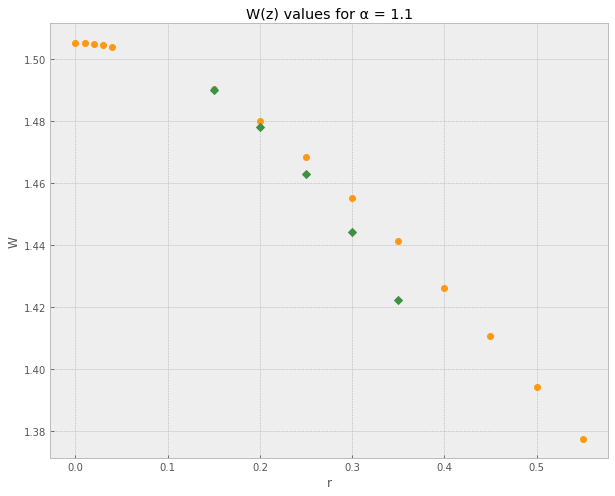

In [109]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_6.r, t_6.W_1, 'o', color='#FF9912', label = t_6.dd_sign_1)
plt.plot(t_6.r, t_6.W_2, 'D', color='#3D9140', label = t_6.dd_sign_2)
plt.title("W(z) values for α = 1.1")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [110]:
t_6=t_6.fillna(0)
m1 = t_6['W_1'].max()
m2 = t_6['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.5051388225846218

In [111]:
α_7 = 1.15

In [112]:
α = α_7
for r in np.arange(0.0, 0.10, 0.05):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.0 ,root =  1.6591501235961914
for r =  0.05 ,root =  1.572218894958496


In [113]:
for r in np.arange(0.30, 0.34, 0.01):
    x = bisect(e, 1, 1.5, xtol = 1e-6)
    print("for r = ", r, "root = ", x)

for r =  0.3 root =  1.1373224258422852
for r =  0.31 root =  1.1199331283569336
for r =  0.32 root =  1.102543830871582
for r =  0.33 root =  1.0851545333862305
for r =  0.34 root =  1.067765235900879


In [114]:
for r in np.arange(0.30, 0.34, 0.01):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, "root = ", x)

for r =  0.3 root =  1.544631004333496
for r =  0.31 root =  1.5501813888549805
for r =  0.32 root =  1.5554819107055664
for r =  0.33 root =  1.5605401992797852
for r =  0.34 root =  1.5653696060180664


In [115]:
for r in np.arange(0.235, 0.246, 0.005):
    x = bisect(e, 1, 1.5, xtol = 1e-6)
    print("for r = ", r, "root = ", x)

for r =  0.235 root =  1.2503347396850586
for r =  0.24 root =  1.241642951965332
for r =  0.245 root =  1.2329511642456055


In [116]:
for r in np.arange(0.235, 0.246, 0.005):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, "root = ", x)

for r =  0.235 root =  1.5015192031860352
for r =  0.24 root =  1.505324363708496
for r =  0.245 root =  1.5090417861938477


In [117]:
for r in np.arange(0.05, 0.10, 0.05):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.05 ,root =  1.214207649230957


In [118]:
for r in np.arange(0.25, 0.38, 0.05):
    x = bisect(e, 1.0, 1.5, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.25 ,root =  1.224257469177246
for r =  0.3 ,root =  1.1373224258422852
for r =  0.35 ,root =  1.0503759384155273


In [119]:
for r in np.arange(0.25, 0.30, 0.01):
    x = bisect(e, 1.5, 2.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.25 ,root =  1.512669563293457
for r =  0.26 ,root =  1.5196733474731445
for r =  0.27 ,root =  1.5263547897338867
for r =  0.28 ,root =  1.532731056213379
for r =  0.29000000000000004 ,root =  1.5388193130493164


In [120]:
for r in np.arange(0.4, 0.60, 0.05):
    x = bisect(e, 0.5, 1.0, xtol = 1e-6)
    print("for r = ", r, ",root = ", x)

for r =  0.4 ,root =  0.9634256362915039
for r =  0.45 ,root =  0.8764734268188477
for r =  0.5 ,root =  0.7895193099975586
for r =  0.55 ,root =  0.7025651931762695


In [121]:
α_7_root_1 = [1.659150, 1.57222, 1.528765, 1.511391, 1.501519, 1.509041, 1.512670, 1.5446310, 1.560540, 1.5699758, 1.589959, 1.605418, 1.616936, 1.6249456]
α_7_root_2 = [None, 1.214207, 1.292334, 1.315133, 1.250334, 1.232951, 1.224257, 1.1373224, 1.0851545, 1.0503759, 0.96342563, 0.876473, 0.789519, 0.702565]
rent = [0, 0.05, 0.075, 0.085, 0.235, 0.245, 0.25, 0.30, 0.33, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
t_7 = pd.DataFrame(list(zip(rent, α_7_root_1, α_7_root_2)), columns =['r', 'α_7_root_1', 'α_7_root_2'])

In [122]:
soln_1 = []
for (i, j) in zip(t_7.α_7_root_1, t_7.r):
    y = math.fabs(c(i, j))
    soln_1.append(y)
t_7['W_1'] = soln_1
soln_2 = []
for (i, j) in zip(t_7.α_7_root_2, t_7.r):
    y = math.fabs(c(i, j))
    soln_2.append(y)
t_7['W_2'] = soln_2
θ_1a = [] # Taking \alpha = 1
for (i, j) in zip(t_7.α_7_root_1, t_7.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1a.append(x)
t_7['θ_1a'] = θ_1a
θ_1b = [] # Taking \alpha = 1
for (i, j) in zip(t_7.α_7_root_2, t_7.r):
    x = math.fabs(i*i*sym.log(2)/((i+j)*2*sym.log(2) - 1)) - 1
    θ_1b.append(x)
t_7['θ_1b'] = θ_1b
θ_2a = [] # Taking \alpha = 1
for i in t_7.α_7_root_1:
    x = i - 1
    θ_2a.append(x)
t_7['θ_2a'] = θ_2a
θ_2b = [] # Taking \alpha = 1
for i in t_7.α_7_root_2:
    x = i - 1
    θ_2b.append(x)
t_7['θ_2b'] = θ_2b
# apply function
t_7['θ_a_opt'] = t_7.apply(lambda x: 'Yes' if x['θ_1a'] < x['θ_2a'] else 'No', axis=1)
t_7['θ_b_opt'] = t_7.apply(lambda x: 'Yes' if x['θ_1b'] < x['θ_2b'] else 'No', axis=1)
sign_x1 = []
for (i,j) in zip(t_7.α_7_root_1, t_7.r):
    y = complex(g(i, j))
    sign_x1.append(np.sign(y.real))
sign_x2 = []
for (i,j) in zip(t_7.α_7_root_2, t_7.r):
    y = complex(g(i, j))
    sign_x2.append(np.sign(y.real))
t_7['dd_sign_1'] = sign_x1
t_7['dd_sign_2'] = sign_x2

In [123]:
t_7=t_7.fillna(0)
m1 = t_7['W_1'].max()
m2 = t_7['W_2'].max()
max(m1, m2) # Global maxima before constraints

1.4861345445655825

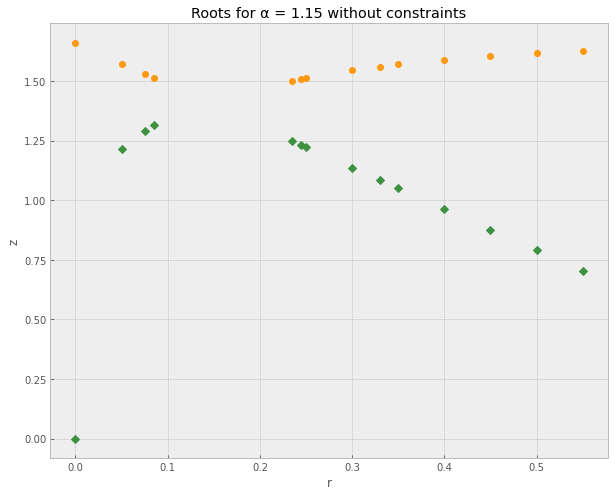

In [124]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_7.r, t_7['α_7_root_1'], 'o', color='#FF9912')
plt.plot(t_7.r, t_7['α_7_root_2'], 'D', color='#3D9140')
plt.title("Roots for α = 1.15 without constraints")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

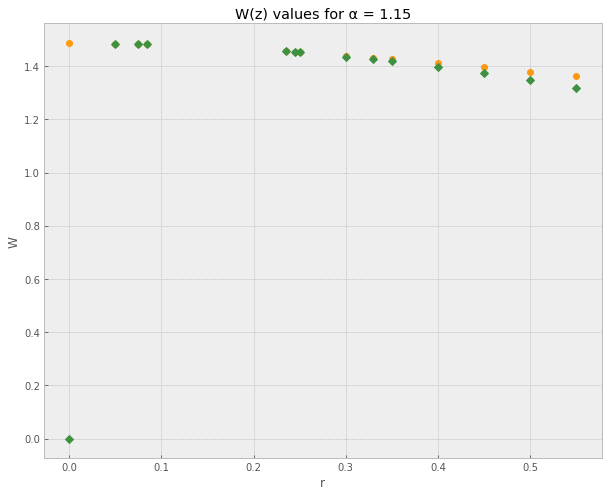

In [125]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_7.r, t_7.W_1, 'o', color='#FF9912', label = t_7.dd_sign_1)
plt.plot(t_7.r, t_7.W_2, 'D', color='#3D9140', label = t_7.dd_sign_2)
plt.title("W(z) values for α = 1.15")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [126]:
t_7.iloc[12:, 4:5] = None
t_7.iloc[12:, 2:3] = None

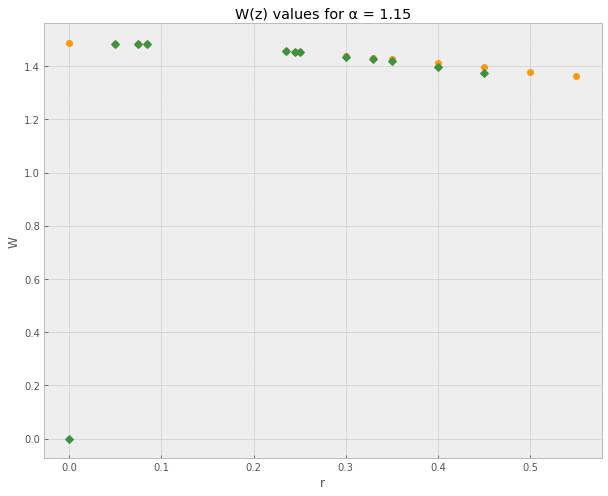

In [127]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot( t_7.r, t_7.W_1, 'o', color='#FF9912')
plt.plot( t_7.r, t_7.W_2,'D', color='#3D9140')
plt.title("W(z) values for α = 1.15")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [128]:
t_7

,r,α_7_root_1,α_7_root_2,W_1,W_2,θ_1a,θ_1b,θ_2a,θ_2b,θ_a_opt,θ_b_opt,dd_sign_1,dd_sign_2
0,0.000,1.659150,0.000000,1.486135,0.000000,0.467675,0.000000,0.659150,0.000000,Yes,No,-1.0,0.0
1,0.050,1.572220,1.214207,1.484737,1.482327,0.371934,0.357901,0.572220,0.214207,Yes,No,-1.0,-1.0
2,0.075,1.528765,1.292334,1.482991,1.482244,0.324273,0.292695,0.528765,0.292334,Yes,No,-1.0,-1.0
3,0.085,1.511391,1.315133,1.482097,1.481664,0.305251,0.274022,0.511391,0.315133,Yes,Yes,-1.0,-1.0
4,0.235,1.501519,1.250334,1.456207,1.455270,0.110433,0.023143,0.501519,0.250334,Yes,Yes,-1.0,-1.0
5,0.245,1.509041,1.232951,1.453831,1.452587,0.102556,0.004600,0.509041,0.232951,Yes,Yes,-1.0,-1.0
6,0.250,1.512670,1.224257,1.452622,1.451204,0.098685,-0.004658,0.512670,0.224257,Yes,Yes,-1.0,-1.0
7,0.300,1.544631,1.137322,1.439819,1.435835,0.062014,-0.096685,0.544631,0.137322,Yes,Yes,-1.0,-1.0
8,0.330,1.560540,1.085155,1.431596,1.425272,0.041439,-0.151378,0.560540,0.085155,Yes,Yes,-1.0,-1.0
9,0.350,1.569976,1.050376,1.425920,1.417671,0.028185,-0.187597,0.569976,0.050376,Yes,Yes,-1.0,-1.0


In [129]:
t_7.iloc[:3, 4:5] = None
t_7.iloc[:3, 2:3] = None

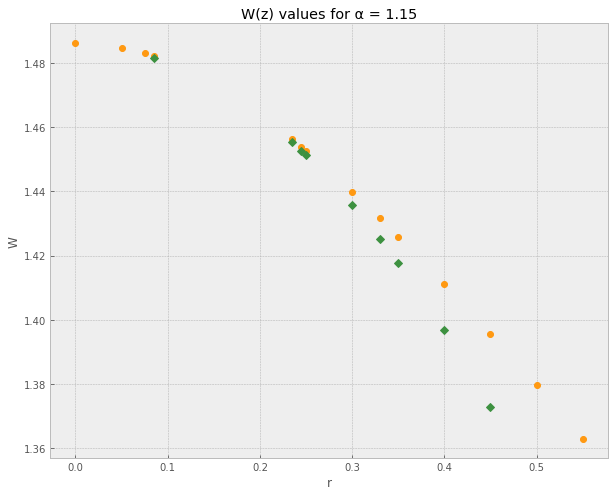

In [130]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(t_7.r, t_7.W_1, 'o', color='#FF9912')
plt.plot(t_7.r, t_7.W_2, 'D', color='#3D9140')
plt.title("W(z) values for α = 1.15")
plt.xlabel("r")
plt.ylabel("W")
plt.show()

In [131]:
t_7=t_7.fillna(0)
m1 = t_7['W_1'].max()
m2 = t_7['W_2'].max()
max(m1, m2) # Global maxima after constraints

1.4861345445655825

$α = 1$

In [132]:
first_best = [1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427, 1.4427]
second_best = [1.4427, 1.5281839, 1.5937738, 1.6468496, 1.690875, 1.7278414, 1.75901699, 1, 1, 1, 1, 1, 1, 1]
PBE = [1.4427, 1.5281839, 1.5937738, 1.6468496, 1.690875, 1.7278414, 1.75901699, 1.75901699, 1.78526020, 1.8071871, 2.0, math.inf, math.inf, math.inf]
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.31, 0.31, 0.35, 0.39, 0.39, 0.45, 0.50, 0.55]
len(PBE)

14

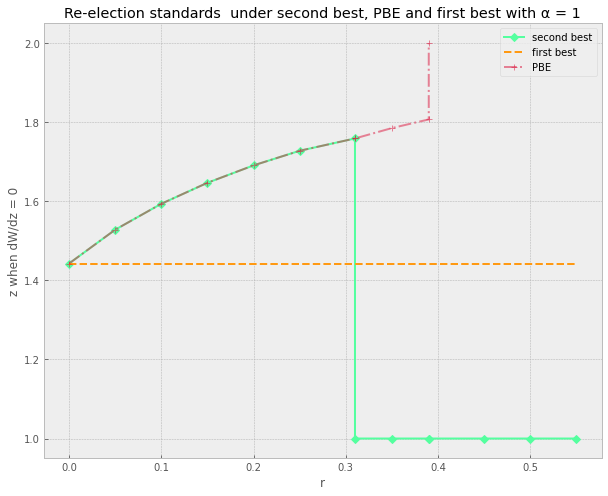

In [133]:
plt.figure(figsize = (10, 8))
plt.style.use('bmh')
plt.plot(rent, second_best, color = '#54FF9F', linestyle='solid', marker = 'D', label='second best')
plt.plot(rent, first_best, color = "#FF9912", linestyle = "--", label = 'first best')
plt.plot(rent, PBE, color = "#DC143C", linestyle = "-.", marker = '+', label = 'PBE', alpha = 0.5)
plt.title("Re-election standards  under second best, PBE and first best with α = 1")
plt.xlabel("r")
plt.ylabel("z when dW/dz = 0")
# and a legend
plt.legend(loc = 'upper right')

 ### α < 1

In [134]:
rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
a_second_best = [1.5068750, 1.58925152, 1.6553431, 1.7103281, 1.7569647, 1.79692364, 1.83130169, 1.8608713, 1.8861875, 1.9076662]
a_pbe = [1.5068750, 1.58925152, 1.6553431, 1.7103281, 1.7569647, 1.79692364, 1.83130169, 1.8608713, 1.8861875, 1.9076662]
b_second_best = [1.6412706, 1.7415991, 1.827937, 1.9040766, 1.9722414, 2.0338716, 2.0899591, 2.141221, 2.188193, 2.23128796]
b_pbe = [1.6412706, 1.7415991, 1.827937, 1.9040766, 1.9722414, 2.0338716, 2.0899591, 2.141221, 2.188193, 2.23128796]
c_second_best = [1.674491, 1.788737, 1.888654, 1.978139, 2.0594931, 2.1342096, 2.2033205, 2.2675734, 2.32753468, 2.3836374]
c_pbe = [1.674491, 1.788737, 1.888654, 1.978139, 2.0594931, 2.1342096, 2.2033205, 2.2675734, 2.32753468, 2.3836374]

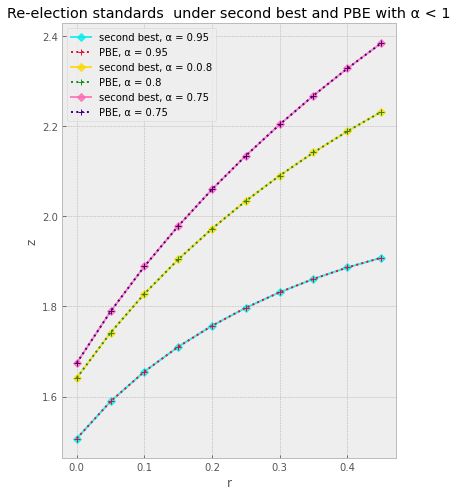

In [135]:
plt.figure(figsize = (6, 8))
plt.style.use('bmh')
plt.plot(rent, a_second_best, color = '#00EEEE', linestyle='solid', marker = 'D', label='second best, α = 0.95', alpha = 0.8)
plt.plot(rent, a_pbe, color = "#DC143C", linestyle = ":", marker = '+', label = 'PBE, α = 0.95')
plt.plot(rent, b_second_best, color = '#FFD700', linestyle='solid', marker = 'D', label='second best, α = 0.0.8', alpha = 0.8)
plt.plot(rent, b_pbe, color = "#228B22", linestyle = ":", marker = '+', label = 'PBE, α = 0.8')
plt.plot(rent, c_second_best, color = '#FF69B4', linestyle='solid', marker = 'D', label='second best, α = 0.75', alpha = 0.8)
plt.plot(rent, c_pbe, color = "#4B0082", linestyle = ":", marker = '+', label = 'PBE, α = 0.75')
plt.title("Re-election standards  under second best and PBE with α < 1")
plt.xlabel("r")
plt.ylabel("z")
# and a legend
plt.legend(loc = 'upper left')

### α >= 1

In [136]:
a_rent = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.31, 0.31, 0.35, 0.39, 0.39]
a_second_best = [1.4427, 1.5281839, 1.5937738, 1.6468496, 1.690875, 1.7278414, 1.75901699, 1, 1, 1, 1]
a_pbe = [1.4427, 1.5281839, 1.5937738, 1.6468496, 1.690875, 1.7278414, 1.75901699, 1.75901699, 1.78526020, 1.8071871, 2.0]
b_rent = [0.02, 0.03, 0.04, 0.15, 0.20, 0.25, 0.29, 0.29, 0.35, 0.40, 0.40]
b_second_best = [1.550688, 1.318875, 1.342673, 1.505870, 1.551871, 1.588637, 1.618367, 1, 1, 1, 1]
b_pbe = [1.550688, 1.318875, 1.342673, 1.505870, 1.551871, 1.588637, 1.618367, 1.618367, 1.642415, 1.661683, 1.661683]
c_rent = [0.075, 0.085, 0.235, 0.245, 0.25, 0.33, 0.33, 0.35, 0.41, 0.41]
c_second_best = [1.528765, 1.315133, 1.501519, 1.509041, 1.512670, 1.560540, 1, 1, 1, 1] # α = 1.15 t_7
c_pbe = [1.528765, 1.315133, 1.501519, 1.509041, 1.512670, 1.560540, 1.560540, 1.569976, 1.589959, 2.0]

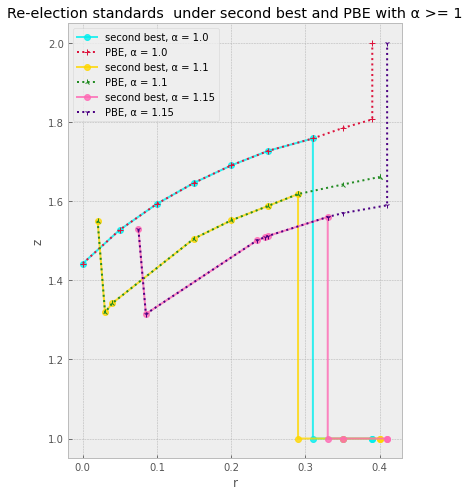

In [137]:
plt.figure(figsize = (6, 8))
plt.style.use('bmh')
plt.plot(a_rent, a_second_best, color = '#00EEEE', linestyle='solid', marker = 'o', label='second best, α = 1.0', alpha = 0.8)
plt.plot(a_rent, a_pbe, color = "#DC143C", linestyle = ":", marker = '+', label = 'PBE, α = 1.0')
plt.plot(b_rent, b_second_best, color = '#FFD700', linestyle='solid', marker = 'o', label='second best, α = 1.1', alpha = 0.8)
plt.plot(b_rent, b_pbe, color = "#228B22", linestyle = ":", marker = '2', label = 'PBE, α = 1.1')
plt.plot(c_rent, c_second_best, color = '#FF69B4', linestyle='solid', marker = 'o', label='second best, α = 1.15', alpha = 0.8)
plt.plot(c_rent, c_pbe, color = "#4B0082", linestyle = ":", marker = '1', label = 'PBE, α = 1.15')
plt.title("Re-election standards  under second best and PBE with α >= 1")
plt.xlabel("r")
plt.ylabel("z")
# and a legend
plt.legend(loc = 'upper left')